#**Abstract**

 The dataset pertaining to horse health encompasses a wide range of information related to the medical conditions of horses. It covers diverse attributes, including both numeric and categorical features, focusing on physiological parameters and subjective evaluations. Notable elements include details about surgery history, age, rectal temperature, pulse rate, respiratory rate, and various indicators reflecting circulatory and abdominal health.

Significant aspects of the dataset involve subjective evaluations like the color of mucous membranes, capillary refill time, pain levels, and peristalsis, contributing to the comprehensive assessment of a horse's well-being. Parameters related to the abdomen, such as distension and examination results, offer crucial insights into the potential need for surgical interventions. The dataset also incorporates information about nasogastric tube characteristics, reflux metrics, and pH levels, providing indications of gastrointestinal health.

Moreover, the dataset encompasses information about lesions, specifying their types and retrospective considerations for surgical interventions. While the presence of pathological data is noted, its significance is deemed negligible due to its absence in the relevant cases.

A notable challenge involves addressing missing values (NA's) throughout the dataset, necessitating the application of various imputation techniques to enhance the dataset's reliability for subsequent analyses. The overarching objective is to predict horses' outcomes based on their past medical conditions, as indicated by the "outcome" variable, which categorizes whether the horse lived, died, or was euthanized

#**Data Set**

Attribute Information:

1: Surgery? 1 = Yes, it had surgery 2 = It was treated without surgery

2: Age 1 = Adult horse 2 = Young (< 6 months)

3: Hospital Number: numeric id the case number assigned to the horse (may not be unique if the horse is treated > 1 time)

4: Rectal temperature

In degrees celsius. An elevated temp may occur due to infection. temperature may be reduced when the animal is in late shock normal temp is 37.8 this parameter will usually change as the problem progresses

5: Pulse linear the heart rate in beats per minute is a reflection of the heart condition: 30 -40 is normal for adults rare to have a lower than normal rate although athletic horses may have a rate of 20-25 animals with painful lesions or suffering from circulatory shock may have an elevated heart rate

6: Respiratory Rate

Linear normal rate is 8 to 10 usefulness is doubtful due to the great fluctuations

7: Temperature of extremities

a subjective indication of peripheral circulation possible values: 1 = Normal 2 = Warm 3 = Cool 4 = Cold cool to cold extremities indicate possible shock hot extremities should correlate with an elevated rectal temp.

8: Peripheral Pulse

possible values are: 1 = normal 2 = increased 3 = reduced 4 = absent normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion

9: Mucous membranes

a subjective measurement of colour

10: capillary refill time

a clinical judgement. The longer the refill, the poorer the circulation

11: Pain - a subjective judgement of the horse's pain level

In general, the more painful, the more likely it is to require surgery prior treatment of pain may mask the pain level to some extent

12: Peristalsis

an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases possible values: 1 = hypermotile 2 = normal 3 = hypomotile 4 = absent

13: Abdominal Distension

An IMPORTANT parameter. an animal with abdominal distension is likely to be painful and have reduced gut motility. a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure

14: Nasogastric tube

this refers to any gas coming out of the tube a large gas cap in the stomach is likely to give the horse discomfort

15: Nasogastric reflux

the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine

16: Nasogastric reflux PH

17: Rectal examination - feces

absent feces probably indicates an obstruction

18: Abdomen

possible values 1 = normal 2 = other 3 = firm feces in the large intestine 4 = distended small intestine 5 = distended large intestine 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically 4 and 5 indicate a surgical lesion

19: Packed cell volume

the # of red cells by volume in the blood normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.

20: Total protein

the higher the value the greater the dehydration

21: Abdominocentesis appearance

a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity normal fluid is clear while cloudy or serosanguinous indicates a compromised gut

22: Abdomcentesis total protein

the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL

23: outcome

what eventually happened to the horse? possible values: 1 = lived 2 = died 3 = was euthanized

24: Surgical lesion?

retrospectively, was the problem (lesion) surgical? all cases are either operated upon or autopsied so that this value and the lesion type are always known possible values: 1 = Yes 2 = No

25, 26, 27: type of lesion

The data set consists of :

age, hospital_number, rectal_temperature, pulse, respiratory_rate, temperature_of_extremities, peripheral_pulse, mucous_membranes, capillary_refill_time, pain, peristalsis, abdominal_distention, nasogastric_tube, nasogastric_reflux, rectal_examination, abdomen, packed_cell_volume, total_protein, abdominocentesis_appearance, abdominocentesis_total_protein -The independent variables

Outcome - The dependent variable

There are a total of 299 observations.

**We are initializing H2O in the following steps.**

In [5]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [6]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=91bed56e5080d35489d336c5f95ec388ebc0b83485ddd64b37b5192a5749811e
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


# **Import Libraries**

In [7]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [8]:
min_mem_size=6
run_time=222

In [10]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0jki6c7t
  JVM stdout: /tmp/tmp0jki6c7t/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0jki6c7t/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_aghdlc
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

#**Importing Data**

Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [11]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/Malav-Bhatt/info-6105-spring-2024-Assignment/main/horse.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/Malav-Bhatt/info-6105-spring-2024-Assignment/main/horse.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
dff.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

#**Studying the Data**

In [13]:
dff.describe()

hospital_number  rectal_temp       pulse  respiratory_rate  \
count     2.990000e+02   239.000000  275.000000        241.000000   
mean      1.087733e+06    38.168619   72.000000         30.460581   
std       1.532032e+06     0.733744   28.646219         17.666102   
min       5.184760e+05    35.400000   30.000000          8.000000   
25%       5.289040e+05    37.800000   48.000000         18.000000   
50%       5.303010e+05    38.200000   64.000000         25.000000   
75%       5.347360e+05    38.500000   88.000000         36.000000   
max       5.305629e+06    40.800000  184.000000         96.000000   

       nasogastric_reflux_ph  packed_cell_volume  total_protein  \
count              53.000000          270.000000     266.000000   
mean                4.707547           46.307407      24.274436   
std                 1.982311           10.436743      27.364194   
min                 1.000000           23.000000       3.300000   
25%                 3.000000           38.000000       6.500000   
50%                 5.000000           45.000000       7.500000   
75%                 6.500000           52.000000      56.750000   
max                 7.500000           75.000000      89.000000   

       abdomo_protein      lesion_1     lesion_2     lesion_3  
count      101.000000    299.000000   299.000000   299.000000  
mean         3.039604   3659.709030    90.528428     7.387960  
std          1.967947   5408.472421   650.637139   127.749768  
min          0.100000      0.000000     0.000000     0.000000  
25%          2.000000   2111.500000     0.000000     0.000000  
50%          2.300000   2322.000000     0.000000     0.000000  
75%          3.900000   3209.000000     0.000000     0.000000  
max         10.100000  41110.000000  7111.000000  2209.000000

In [25]:
import plotly.express as px
import pandas as pd

dff.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(dff,
                        lat="lesion_1",
                        lon="lesion_2",
                        hover_name="age",
                        hover_data=["age", "outcome"],
                        color="outcome",
                        color_continuous_scale=color_scale,
                        zoom=4,
                        height=100,
                        width=150)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [19]:
df.types

{'surgery': 'enum',
 'age': 'enum',
 'hospital_number': 'int',
 'rectal_temp': 'real',
 'pulse': 'int',
 'respiratory_rate': 'int',
 'temp_of_extremities': 'enum',
 'peripheral_pulse': 'enum',
 'mucous_membrane': 'enum',
 'capillary_refill_time': 'enum',
 'pain': 'enum',
 'peristalsis': 'enum',
 'abdominal_distention': 'enum',
 'nasogastric_tube': 'enum',
 'nasogastric_reflux': 'enum',
 'nasogastric_reflux_ph': 'real',
 'rectal_exam_feces': 'enum',
 'abdomen': 'enum',
 'packed_cell_volume': 'real',
 'total_protein': 'real',
 'abdomo_appearance': 'enum',
 'abdomo_protein': 'real',
 'outcome': 'enum',
 'surgical_lesion': 'enum',
 'lesion_1': 'int',
 'lesion_2': 'int',
 'lesion_3': 'int',
 'cp_data': 'enum'}

In [25]:
df.shape


(299, 28)

In [21]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [26]:
print(df_train.shape)
print(df_test.shape)

(237, 28)
(62, 28)


**To Display columns**

In [27]:
#Display all columns in X
X=df.columns
print(X)


['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']


In [28]:
#Seperate Dependent variable from Independent variable
y_numeric ='outcome'
X.remove(y_numeric)
print(X)

['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']


#**H20 AutoML Execution**
Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [29]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [30]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |
23:41:24.909: _train param, Dropping bad and constant columns: [lesion_3]

██
23:41:30.834: _train param, Dropping bad and constant columns: [lesion_3]
23:41:31.101: GLM_1_AutoML_1_20240219_234124 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 78 out of bounds for length 78
23:41:31.110: _train param, Dropping bad and constant columns: [lesion_3]
23:41:31.156: GBM_1_AutoML_1_20240219_234124 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20240219_234124.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 189.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 189.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weig

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20240219_234124_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    26                 78                          16518                  4            4            4             7             16            12.2436

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.04904391887933851
RMSE: 0.2214586166292441
LogLoss: 0.21588177180083756
Mean Per-Class Error: 0.031997514756135444
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
died    euthanized    lived    Error      Rate
------  ------------  -------  ---------  -------
54      0             4        0.0689655  4 / 58
1       36            0        0.027027   1 / 37
0       0             142      0          0 / 142
55      36            146      0.021097   5 / 237

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.978903
2    1
3    1

ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.2480588385244786
RMSE: 0.49805505571621156
LogLoss: 0.7192679262150604
Mean Per-Class Error: 0.4217038796931949
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
died    euthanized    lived    Error     Rate
------  ------------  -------  --------  --------
36      1             21       0.37931   22 / 58
6       11            20       0.702703  26 / 37
16      10            116      0.183099  26 / 142
58      22            157      0.312236  74 / 237

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.687764
2    0.907173
3    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.671188  0.0499811  0.6875        0.583333      0.680851      0.702128      0.702128
auc                      nan       0          nan           nan           nan           nan           nan
err                      0.328812  0.0499811  0.3125        0.416667      0.319149      0.297872      0.297872
err_count                15.6      2.50998    15            20            15            14            14
logloss                  0.74285   0.173777   0.792853      1.02709       0.628806      0.621622      0.643875
max_per_class_error      0.727778  0.189948   0.75          0.8           0.8           0.4           0.888889
mean_per_class_accuracy  0.569615  0.0705919  0.568681      0.518774      0.536471      0.691582      0.532567
mean_per_class_error     0.430385  0.0705919  0.431319      0.481226      0.463529      0.308418      0.467433
mse                      0.250007  0.0569114  0.271827      0.340099      0.217501      0.219067      0.20154
pr_auc                   nan       0          nan           nan           nan           nan           nan
r2                       0.635635  0.111378   0.64736       0.449728      0.748

**Interpreting the above results**

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [31]:
print(aml.leaderboard)

model_id                                                   mean_per_class_error    logloss      rmse       mse
GBM_grid_1_AutoML_1_20240219_234124_model_2                            0.421704   0.719268  0.498055  0.248059
GBM_2_AutoML_1_20240219_234124                                         0.42707    0.696707  0.489286  0.239401
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_234124                0.438169   0.761235  0.519273  0.269645
GBM_grid_1_AutoML_1_20240219_234124_model_9                            0.438427   0.691128  0.490474  0.240565
GBM_grid_1_AutoML_1_20240219_234124_model_5                            0.443122   0.692344  0.491403  0.241476
GBM_grid_1_AutoML_1_20240219_234124_model_12                           0.445469   0.749246  0.503969  0.253985
GBM_grid_1_AutoML_1_20240219_234124_model_8                            0.445745   0.724504  0.497294  0.247301
GBM_grid_1_AutoML_1_20240219_234124_model_13                           0.446521   0.752486  0.506699  0.256744
X

In [38]:
!ls

sample_data


In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dff[['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']]
vif = pd.DataFrame()
vif["variables"] = Multic.columns
# vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables
0                 surgery
1                     age
2         hospital_number
3             rectal_temp
4                   pulse
5        respiratory_rate
6     temp_of_extremities
7        peripheral_pulse
8         mucous_membrane
9   capillary_refill_time
10                   pain
11            peristalsis
12   abdominal_distention
13       nasogastric_tube
14     nasogastric_reflux
15  nasogastric_reflux_ph
16      rectal_exam_feces
17                abdomen
18     packed_cell_volume
19          total_protein
20      abdomo_appearance
21         abdomo_protein
22                outcome
23        surgical_lesion
24               lesion_1
25               lesion_2
26               lesion_3
27                cp_data

In [42]:
Multic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [46]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    Variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : {ndarray, DataFrame}
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
  

In [162]:
non_numeric_cols = Multic.select_dtypes(include='object').columns
Multic.drop(non_numeric_cols, axis=1, inplace=True)

In [164]:
Multic.columns

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

In [165]:
Multic.shape

(299, 11)

In [166]:
Multic.isnull().sum()

hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
nasogastric_reflux_ph    246
packed_cell_volume        29
total_protein             33
abdomo_protein           198
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64

In [169]:
dff.dropna()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
10      yes  adult           528548         38.1   66.0              12.0   
54       no  adult           529461         40.3  114.0              36.0   
64      yes  adult           529667         39.0   64.0              36.0   
91       no  adult           529461         40.3  114.0              36.0   
104     yes  adult           527563         37.8   52.0              24.0   
188     yes  adult          5299603         38.3   60.0              16.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
10                 cool          reduced      bright_red   
54                 cool          reduced     normal_pink   
64                 cool           normal   pale_cyanotic   
91                 cool          reduced     normal_pink   
104              normal          reduced       pale_pink   
188                cool           normal     normal_pink   

    capillary_refill_time  ... packed_cell_volume total_protein  \
10             less_3_sec  ...               44.0           6.0   
54             more_3_sec  ...               57.0           8.1   
64             more_3_sec  ...               44.0           7.5   
91             more_3_sec  ...               57.0           8.1   
104            less_3_sec  ...               48.0           6.6   
188            less_3_sec  ...               30.0           6.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
10             cloudy            3.6       lived              yes     2124   
54      serosanguious            4.5  euthanized              yes     7400   
64      serosanguious            5.0       lived              yes     2113   
91      serosanguious            4.5        died              yes     3205   
104             clear            3.7        died              yes     5400   
188             clear            3.0       lived              yes    31110   

    lesion_2  lesion_3  cp_data  
10         0         0      yes  
54         0         0      yes  
64         0         0      yes  
91         0         0      yes  
104        0         0       no  
188        0         0       no  

[6 rows x 28 columns]

In [172]:
dff.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [ ]:
dff['missing_column'].fillna(df['missing_column'].mean())

In [193]:

vif = pd.DataFrame()
vif["variables"] = Multic.columns
# vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
print(vif)

                variables
0         hospital_number
1             rectal_temp
2                   pulse
3        respiratory_rate
4   nasogastric_reflux_ph
5      packed_cell_volume
6           total_protein
7          abdomo_protein
8                lesion_1
9                lesion_2
10               lesion_3


In [37]:
dff.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

In [51]:
dff.corr()

hospital_number  rectal_temp     pulse  \
hospital_number               1.000000     0.144118  0.379607   
rectal_temp                   0.144118     1.000000  0.218868   
pulse                         0.379607     0.218868  1.000000   
respiratory_rate              0.273350     0.268846  0.469368   
nasogastric_reflux_ph        -0.005577     0.228306  0.005796   
packed_cell_volume           -0.093508     0.065101  0.405660   
total_protein                -0.228843    -0.060817 -0.086533   
abdomo_protein               -0.044184     0.009343  0.020937   
lesion_1                      0.145397     0.062639  0.079332   
lesion_2                     -0.050433    -0.062876 -0.001899   
lesion_3                     -0.020950     0.029336  0.101412   

                       respiratory_rate  nasogastric_reflux_ph  \
hospital_number                0.273350              -0.005577   
rectal_temp                    0.268846               0.228306   
pulse                          0.469368               0.005796   
respiratory_rate               1.000000               0.127164   
nasogastric_reflux_ph          0.127164               1.000000   
packed_cell_volume             0.086394              -0.131044   
total_protein                 -0.090743              -0.717363   
abdomo_protein                -0.074056               0.539505   
lesion_1                       0.180250               0.089207   
lesion_2                      -0.020601                    NaN   
lesion_3                       0.144773                    NaN   

                       packed_cell_volume  total_protein  abdomo_protein  \
hospital_number                 -0.093508      -0.228843       -0.044184   
rectal_temp                      0.065101      -0.060817        0.009343   
pulse                            0.405660      -0.086533        0.020937   
respiratory_rate                 0.086394      -0.090743       -0.074056   
nasogastric_reflux_ph           -0.131044      -0.717363        0.539505   
packed_cell_volume               1.000000      -0.053075        0.152736   
total_protein                   -0.053075       1.000000       -0.517338   
abdomo_protein                   0.152736      -0.517338        1.000000   
lesion_1                        -0.068743      -0.181468       -0.032938   
lesion_2                        -0.077727       0.223892       -0.153246   
lesion_3                        -0.066180       0.066856       -0.104158   

                       lesion_1  lesion_2  lesion_3  
hospital_number        0.145397 -0.050433 -0.020950  
rectal_temp            0.062639 -0.062876  0.029336  
pulse                  0.079332 -0.001899  0.101412  
respiratory_rate       0.180250 -0.020601  0.144773  
nasogastric_reflux_ph  0.089207       NaN       NaN  
packed_cell_volume    -0.068743 -0.077727 -0.066180  
total_protein         -0.181468  0.223892  0.066856  
abdomo_protein        -0.032938 -0.153246 -0.104158  
lesion_1               1.000000  0.005966  0.005850  
lesion_2               0.005966  1.000000  0.269374  
lesion_3               0.005850  0.269374  1.000000

Text(0.5, 1.0, 'Variable Correlation')

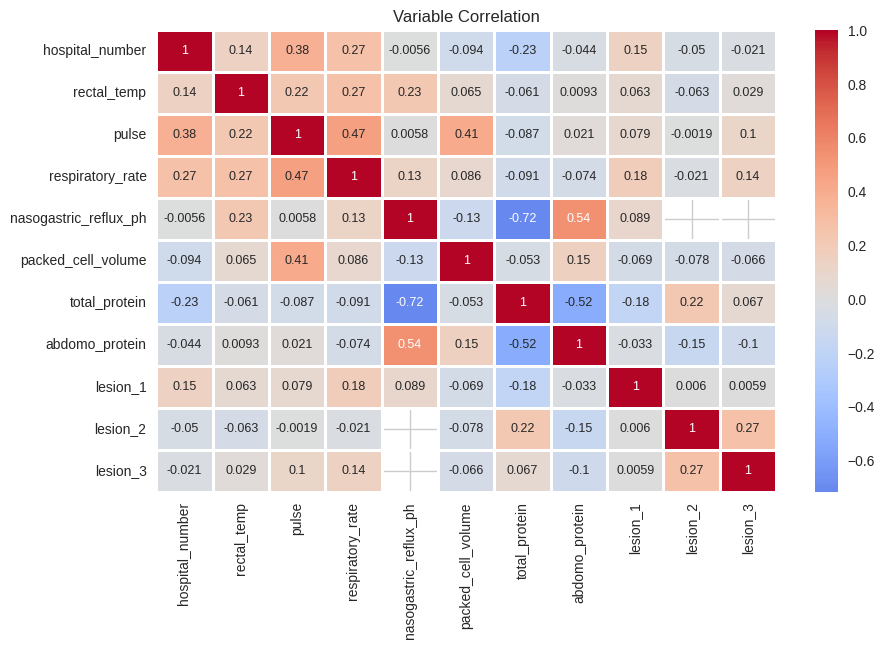

In [52]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dff.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

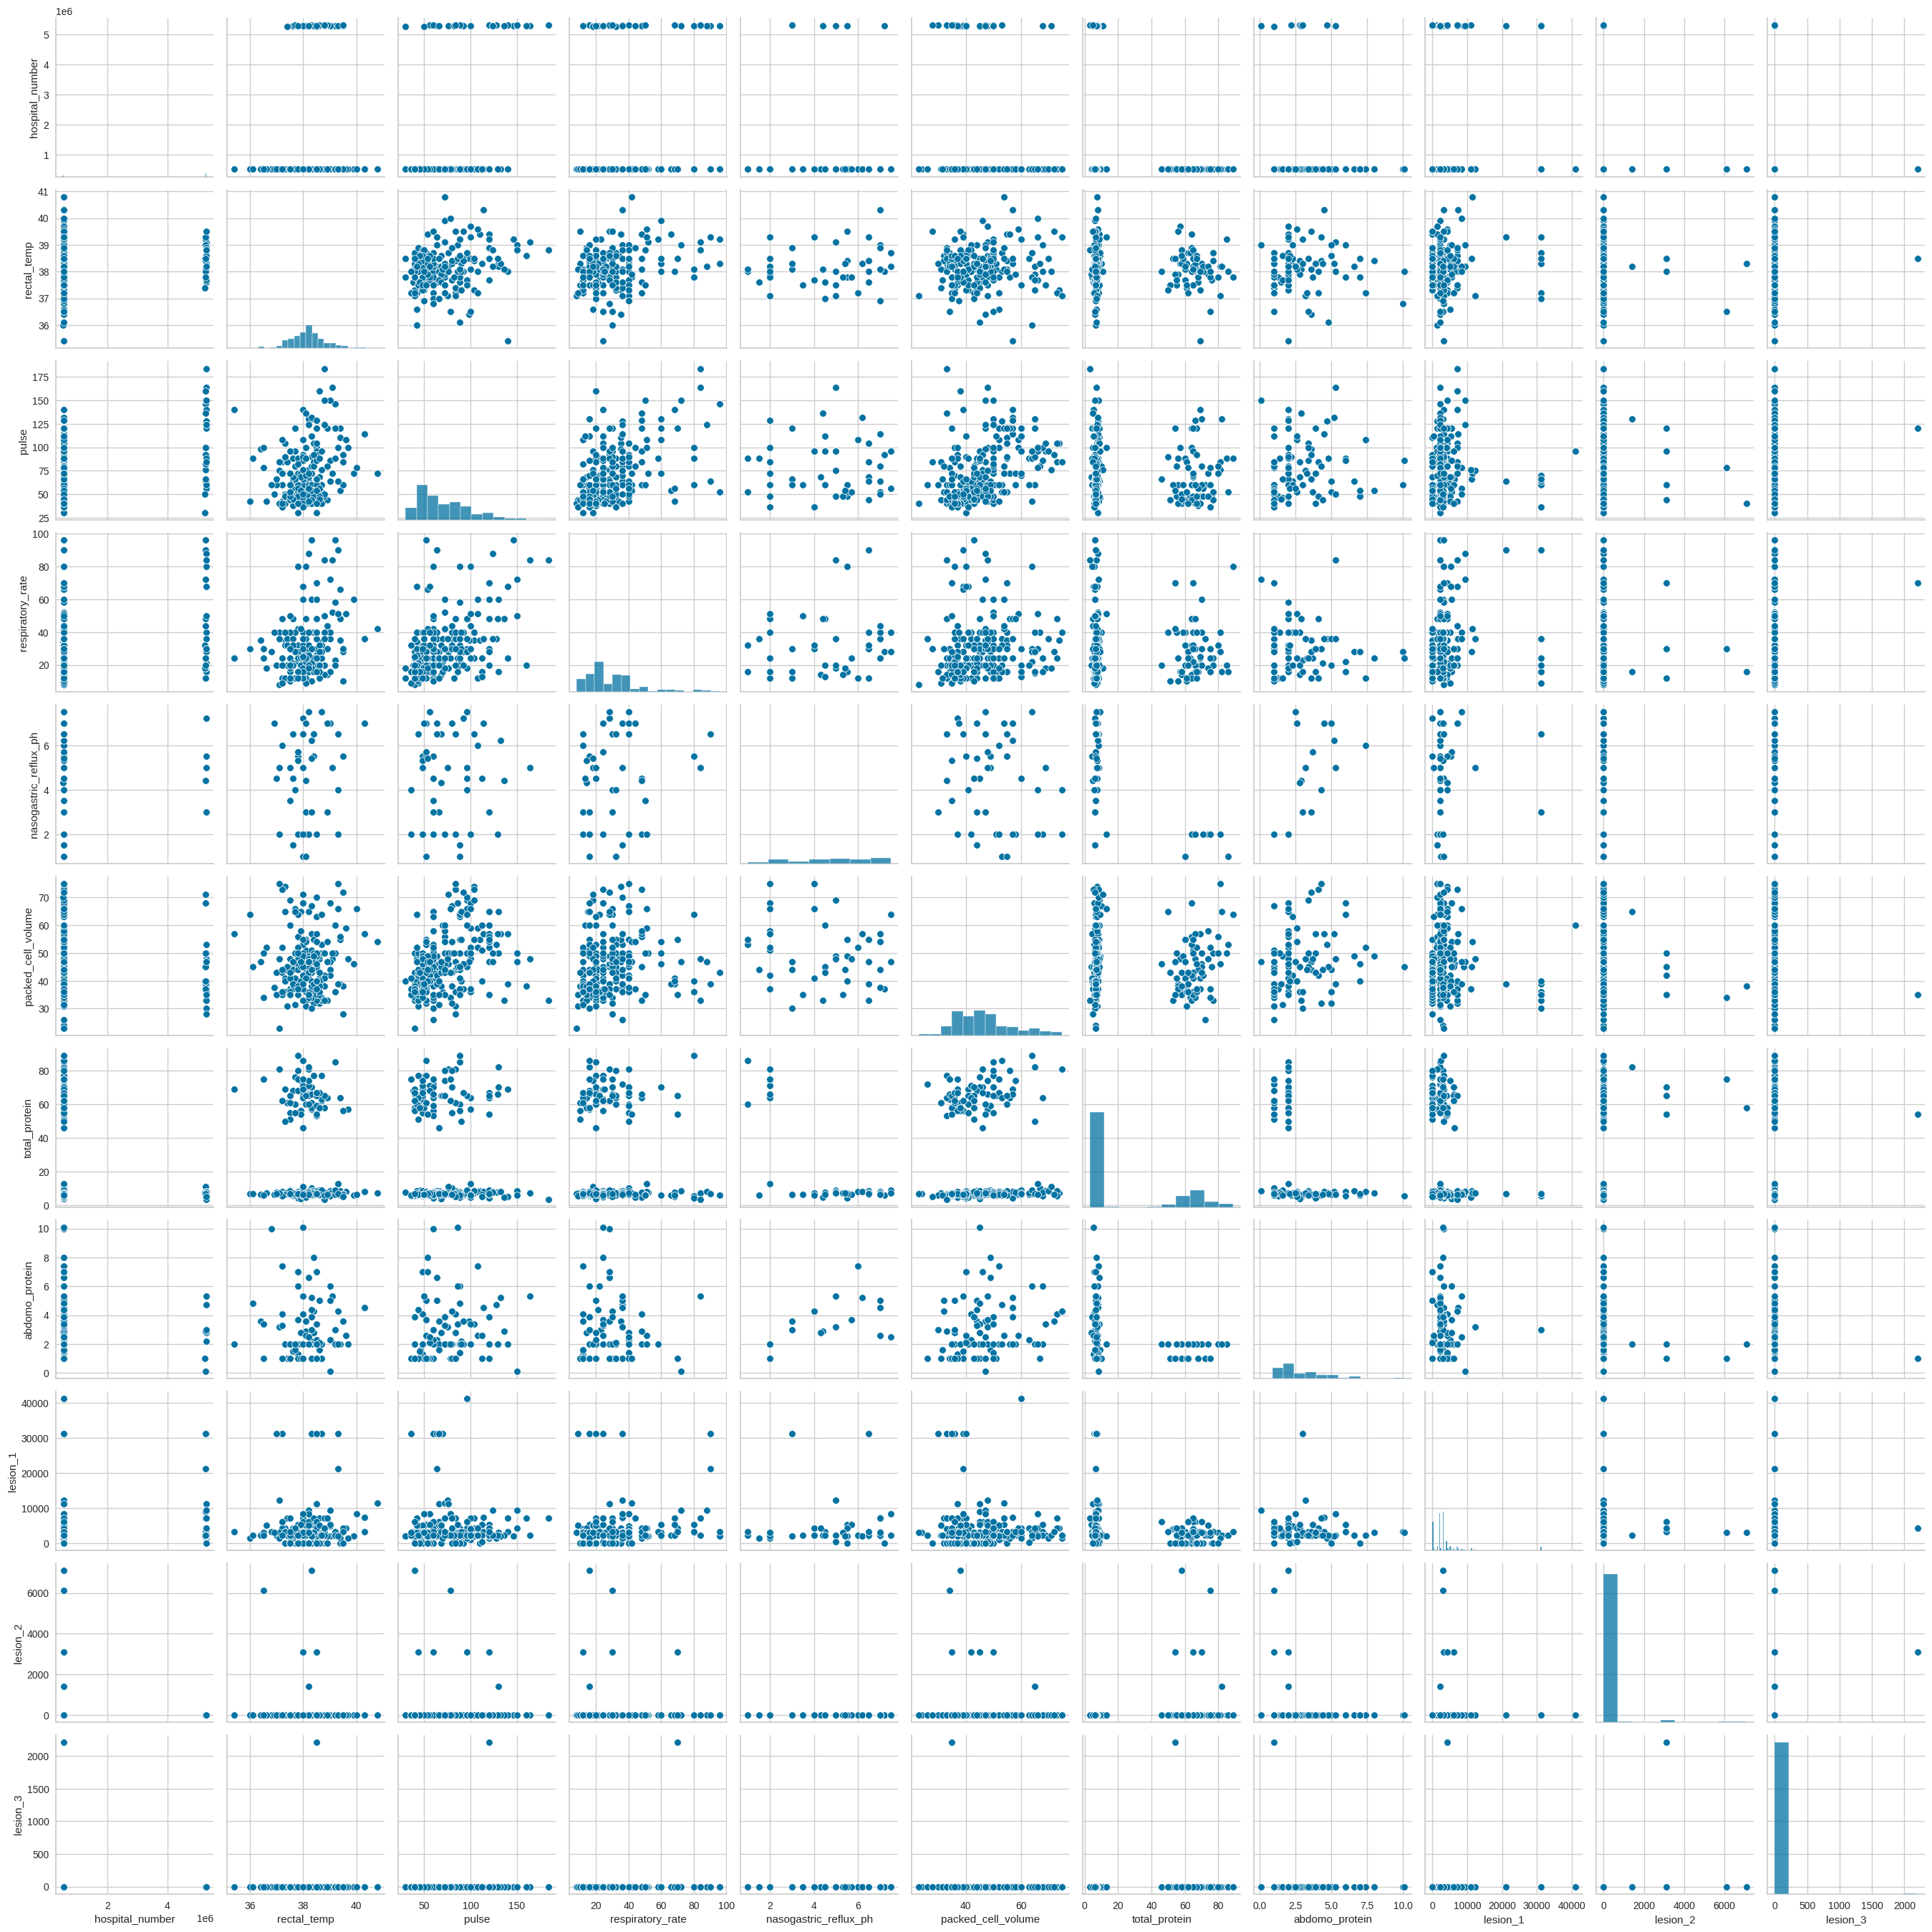

In [53]:
sns.pairplot(dff)


#**H20 AutoML Rexecution on new model**
Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [54]:
df1=df.drop(['total_protein','temp_of_extremities','surgical_lesion','capillary_refill_time','cp_data'], axis=1)

In [55]:
df1_train, df1_test = df1.split_frame([pct_rows])


In [56]:
X1=df1.columns
print(X1)

['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'peripheral_pulse', 'mucous_membrane', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'lesion_1', 'lesion_2', 'lesion_3']


In [57]:
#Seperate Dependent variable from Independent variable
y1_numeric ='outcome'
X1.remove(y1_numeric)
print(X1)

['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'peripheral_pulse', 'mucous_membrane', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'abdomo_appearance', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [58]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [59]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |██
00:02:57.67: GLM_1_AutoML_2_20240220_00251 [GLM def_1] failed: java.lang.ArrayIndexOutOfBoundsException: Index 65 out of bounds for length 65
00:02:57.88: GBM_1_AutoML_2_20240220_00251 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_2_20240220_00251.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 190.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 191.0.
ERRR on field: _min_rows: The dataset size is to

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20240220_00251_model_8


Model Summary: 
    number_of_trees
--  -----------------
    31

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.0010438176649126298
RMSE: 0.0323081671549568
LogLoss: 0.022295613073789893
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
died    euthanized    lived    Error    Rate
------  ------------  -------  -------  -------
61      0             0        0        0 / 61
0       30            0        0        0 / 30
0       0             147      0        0 / 147
61      30            147      0        0 / 238

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.23380907903129172
RMSE: 0.4835380843649151
LogLoss: 0.8357851859674954
Mean Per-Class Error: 0.4051150514850748
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
died    euthanized    lived    Error     Rate
------  ------------  -------  --------  --------
35      2             24       0.42623   26 / 61
8       10            12       0.666667  20 / 30
13      5             129      0.122449  18 / 147
56      17            165      0.268908  64 / 238

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.731092
2    0.92437
3    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
accuracy                 0.731826  0.0931241  0.604167      0.708333      0.708333      0.787234      0.851064
auc                      nan       0          nan           nan           nan           nan           nan
err                      0.268174  0.0931241  0.395833      0.291667      0.291667      0.212766      0.148936
err_count                12.8      4.54972    19            14            14            10            7
logloss                  0.833903  0.238484   1.01982       1.02392       0.905943      0.770061      0.449768
max_per_class_error      0.645238  0.247493   0.571429      0.75          1             0.571429      0.333333
mean_per_class_accuracy  0.605348  0.108781   0.544092      0.55          0.496983      0.676191      0.759477
mean_per_class_error     0.394651  0.108781   0.455908      0.45          0.503017      0.32381       0.240523
mse                      0.233244  0.0685318  0.302         0.277894      0.254246      0.202041      0.130042
pr_auc                   nan       0          nan           nan           nan           nan           nan
r2                       0.6805    0.0892991  0.613225      0.578772      0.704598      0.698441      0.807465
rmse                     0.478206  0.0755238  0.549545      0.527156      0.504228      0.449489      0.360613

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------  -----------------  ---------------  ------------------  -------------------------------  -------------- 

Leaderboard

In [60]:
print(aml1.leaderboard)

model_id                                           mean_per_class_error    logloss      rmse       mse
XGBoost_grid_1_AutoML_2_20240220_00251_model_8                 0.405115   0.835785  0.483538  0.233809
XGBoost_grid_1_AutoML_2_20240220_00251_model_33                0.407609   0.679303  0.479775  0.230184
XGBoost_grid_1_AutoML_2_20240220_00251_model_4                 0.410988   0.673571  0.478343  0.228812
GBM_4_AutoML_2_20240220_00251                                  0.418903   0.71553   0.496826  0.246836
XGBoost_grid_1_AutoML_2_20240220_00251_model_13                0.419832   0.726849  0.484911  0.235139
XGBoost_grid_1_AutoML_2_20240220_00251_model_2                 0.419832   0.661452  0.476803  0.227341
XGBoost_grid_1_AutoML_2_20240220_00251_model_29                0.421917   0.66398   0.476115  0.226686
XGBoost_grid_1_AutoML_2_20240220_00251_model_10                0.426226   0.753535  0.47968   0.230093
XGBoost_grid_1_AutoML_2_20240220_00251_model_1                 0.430943  

In [85]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_dff=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_dff['model_id']:
  models_dict[m]=model_index
  if 'XGBoost' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_dff['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'XGBoost_grid_1_AutoML_2_20240220_00251_model_8': 0,
 'XGBoost_grid_1_AutoML_2_20240220_00251_model_33': 1,
 'XGBoost_grid_1_AutoML_2_20240220_00251_model_4': 2,
 'GBM_4_AutoML_2_20240220_00251': 3}

In [75]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

3


In [76]:
best_model1.algo

'gbm'

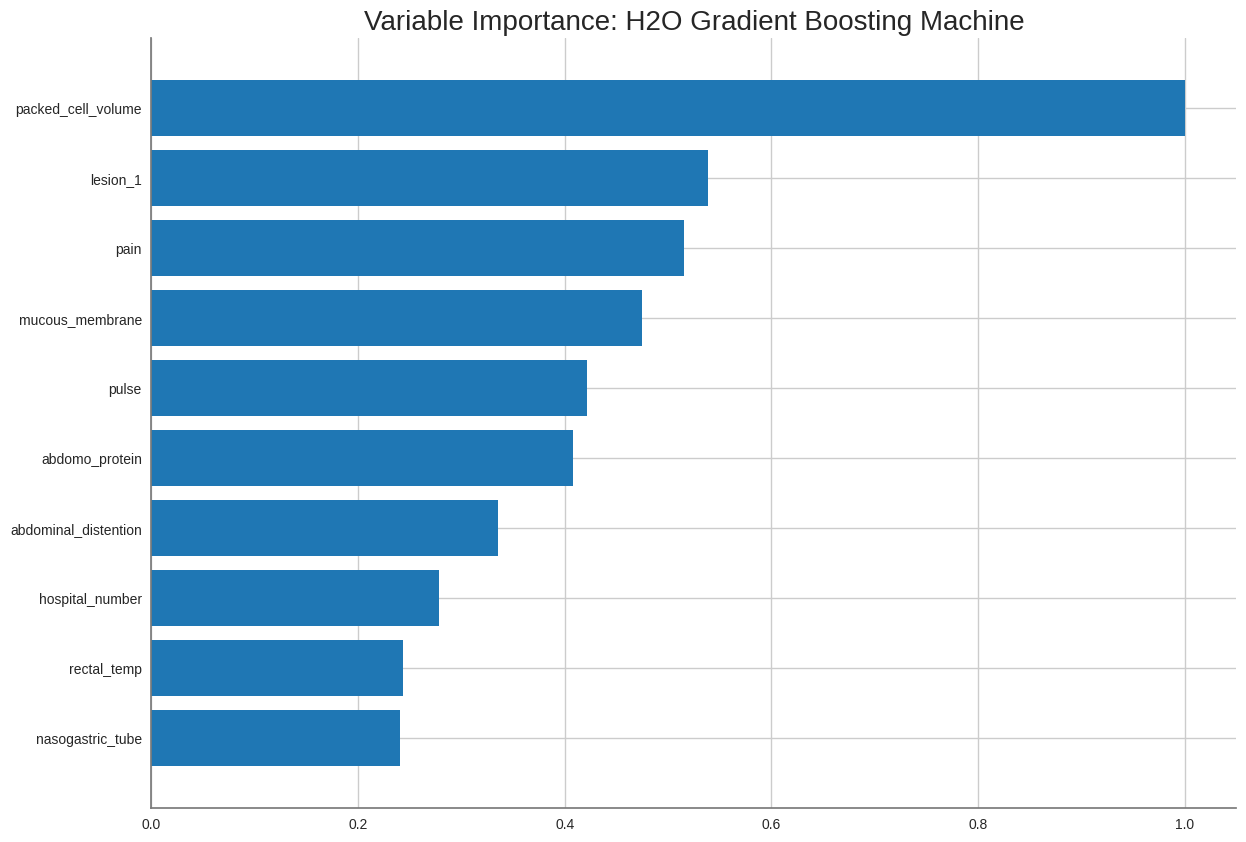

<Figure size 800x550 with 0 Axes>

In [77]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

In [103]:

if glm_index is not 0:
  print(glm_index)


71


In [104]:
# Verify the type of glm_index
print(type(glm_index))

# Check if the value of glm_index is out of range
print(glm_index < aml1.leaderboard.nrows)

# Check if the value of glm_index is a valid index
print(glm_index in range(aml1.leaderboard.nrows))

# If the value of glm_index is out of range, adjust it
if glm_index >= aml1.leaderboard.nrows:
  glm_index = aml1.leaderboard.nrows - 1

# Print the desired row from the leaderboard
# print(aml1.leaderboard[glm_index])

<class 'int'>
True
True


In [105]:
print(glm_index)

71


In [106]:
print(aml1.leaderboard.nrow)

73


#**Checking if assumptions violated**

Classification:

Linearity: The relationship between the independent variables and the dependent variable is linear.

Independence: The observations are independent of each other.

Homoscedasticity: The variance of the residuals is constant across all levels of the independent variables.

Normality: The residuals are normally distributed.

No multicollinearity: The independent variables are not highly correlated with each other.

In [110]:
#Seperating the predictor and target variables
A=dff.drop(['outcome'],axis=1)
B=dff['outcome']

In [ ]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [141]:
print(A_train.columns)

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')


In [137]:
non_numeric_values = A_train[col][~A_train[col].apply(lambda x: x.isnumeric())]
print(non_numeric_values)

6      yes
183     no
185    yes
146     no
30      no
      ... 
188    yes
71     yes
106    yes
270    yes
102     no
Name: surgery, Length: 239, dtype: object


Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [116]:
# Define the mapping dictionary
mapping = {
    "yes": 1,
    "no": 0,
    "true": 1,
    "false": 0,
    "died": 0,
    "lived": 1,
    "euthanized" : 0,
    # Add any other necessary mappings
}

# Apply the mapping to the outcome column
b_train = b_train.map(mapping)
b_test = b_test.map(mapping)

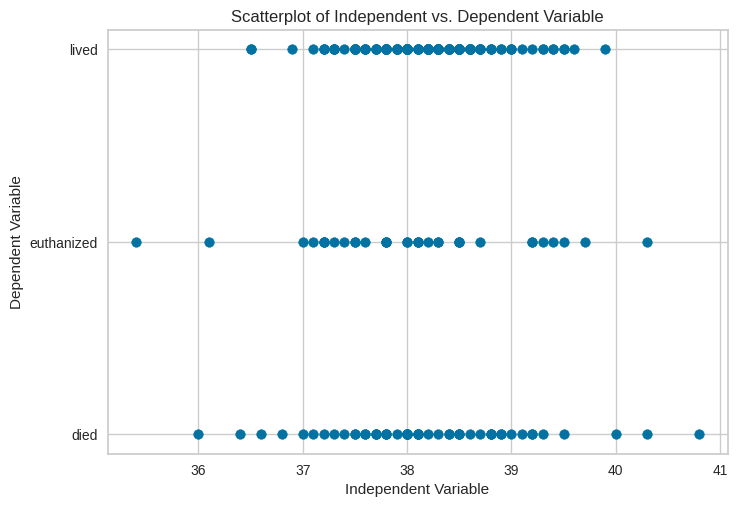

In [192]:
import matplotlib.pyplot as plt


# Get the independent and dependent variables
independent_variable = dff['rectal_temp']
# independent_variable = dff[]
dependent_variable = dff["outcome"]
independent_variable = independent_variable.squeeze()

# Create the scatterplot
plt.scatter(independent_variable, dependent_variable)

# Add labels and title
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Scatterplot of Independent vs. Dependent Variable")

# Show the plot
plt.show()

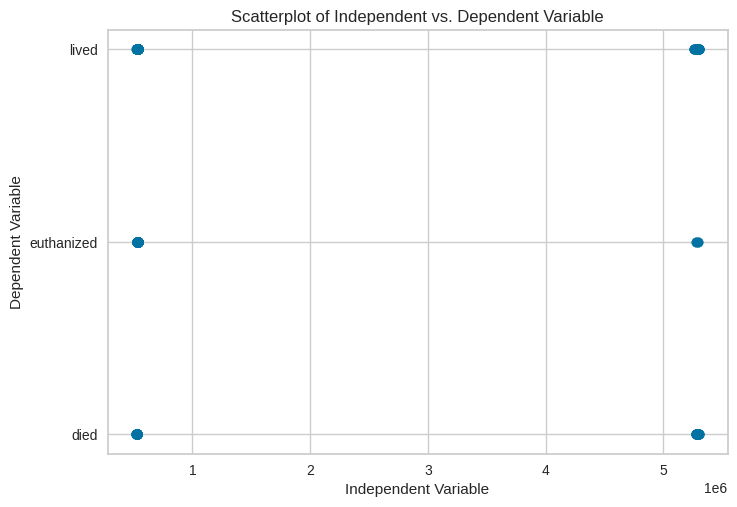

In [194]:
# Get the independent and dependent variables
independent_variable = dff['hospital_number']
# independent_variable = dff[]
dependent_variable = dff["outcome"]
independent_variable = independent_variable.squeeze()

# Create the scatterplot
plt.scatter(independent_variable, dependent_variable)

# Add labels and title
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Scatterplot of Independent vs. Dependent Variable")

# Show the plot
plt.show()

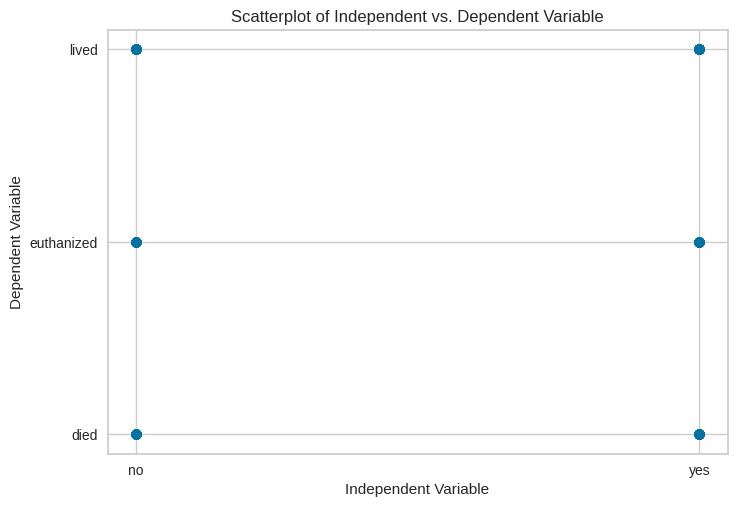

In [196]:
# Get the independent and dependent variables
independent_variable = dff['surgery']
# independent_variable = dff[]
dependent_variable = dff["outcome"]
independent_variable = independent_variable.squeeze()

# Create the scatterplot
plt.scatter(independent_variable, dependent_variable)

# Add labels and title
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Scatterplot of Independent vs. Dependent Variable")

# Show the plot
plt.show()

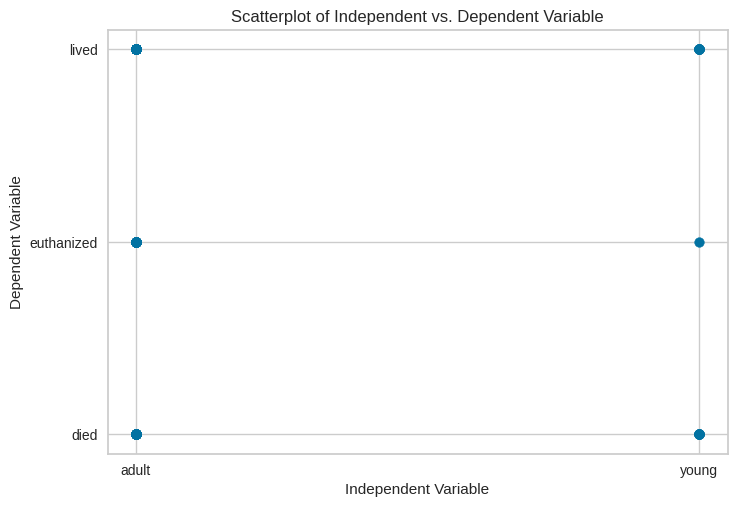

In [197]:
# Get the independent and dependent variables
independent_variable = dff['age']
# independent_variable = dff[]
dependent_variable = dff["outcome"]
independent_variable = independent_variable.squeeze()

# Create the scatterplot
plt.scatter(independent_variable, dependent_variable)

# Add labels and title
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Scatterplot of Independent vs. Dependent Variable")

# Show the plot
plt.show()

In [120]:
print(dff.columns.tolist())

['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']


<Axes: xlabel='outcome', ylabel='Count'>

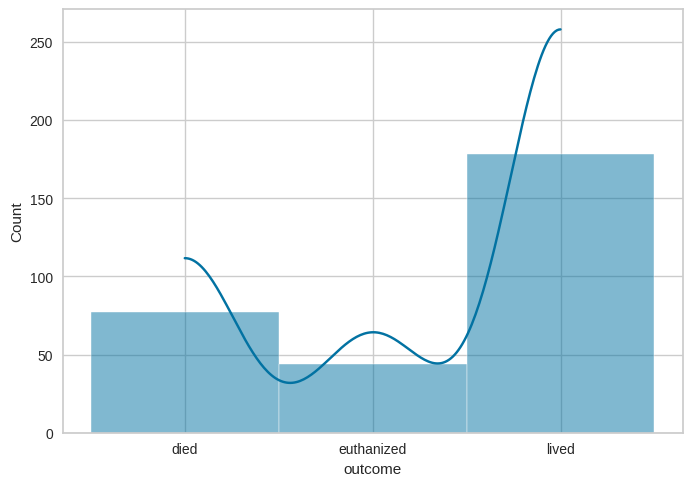

In [129]:
sns.histplot(dff.outcome, kde = True)

Provides a more comprehensive visualization of the data distribution compared to a histogram alone. The histogram bars represent the frequency of each value in the outcome column.

#**Ridge Regularization in H20**


In H2O, the algorithm that incorporates Ridge regularization for classification tasks is the Generalized Linear Model (GLM) with Ridge (L2) regularization. GLM is a flexible modeling framework that supports various error distributions and link functions, making it suitable for both regression and classification tasks.

In [ ]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator

# Assuming 'train' is your H2OFrame containing training data

# Specify predictor columns
predictors = A_train.columns[['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse','respiratory_rate', 'temp_of_extremities', 'peripheral_pulse','mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis','abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux','nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen','packed_cell_volume', 'total_protein', 'abdomo_appearance','abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3','cp_data']]

# Specify response column
response = 'outcome'

# Define GLM model with Ridge regularization
glm_model = H2OGeneralizedLinearEstimator(family="binomial",
                                          alpha=0.0,  # Set alpha to 0 for Ridge regularization
                                          lambda_search=True)  # Enable lambda search for automatic lambda tuning

# Train GLM model
glm_model.train(x=predictors, y=response, training_frame=A_train)

# View model summary
print(glm_model)


In [154]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [198]:
df1_train['outcome'].type

<bound method H2OFrame.type of H2OFrame({'_ex': <Expr(cols_py <Expr(rows <Expr(cols <Expr()#horse.hex> [-20, -7, -24, -10, -28])#py_7_sid_a316; scalar> <Expr(<= <Expr(h2o.runif <Expr(cols <Expr()#horse.hex> [-20, -7, -24, -10, -28])#py_7_sid_a316; scalar> -1)#py_8_sid_a316; scalar> 0.8); scalar>)#py_9_sid_a316> 'outcome'); scalar>})>

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                  mean_per_class_error    logloss      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ----------------------  ---------  --------  --------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_2_20240220_00251_model_29                       0.271505   0.774975  0.482554  0.232858                 426                   0.024564  XGBoost
XGBoost_3_AutoML_2_20240220_00251                                     0.274482   0.807543  0.46944   0.220374                 261                   0.026064  XGBoost
GBM_grid_1_AutoML_2_20240220_00251_model_5                            0.274482   0.775422  0.493443  0.243486                 372                   0.216439  GBM
XGBoost_grid_1_AutoML_2_20240220_00251_model_10                       0.313172   0.888352  0.482486  0.232793                 362                   0.031002  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_23                       0.319124   0.804633  0.493293  0.243338                 279                   0.024815  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_31                       0.322101   0.802776  0.483025  0.233313                 362                   0.026139  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_2                        0.332181   0.787437  0.492229  0.24229                  333                   0.032612  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_1                        0.339958   0.842742  0.509854  0.259951                 247                   0.037041  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_33                       0.34063    0.796439  0.496329  0.246342                 275                   0.04989   XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_3                        0.34063    0.905731  0.489314  0.239428                 992                   0.024453  XGBoost
GBM_4_AutoML_2_20240220_00251                                         0.342934   0.810841  0.515875  0.266127                 190                   0.048273  GBM
XGBoost_grid_1_AutoML_2_20240220_00251_model_27                       0.342934   0.885055  0.495415  0.245436                 396                   0.029726  XGBoost
XGBoost_2_AutoML_2_20240220_00251                                     0.353687   0.786688  0.492414  0.242471                 269                   0.024394  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_4                        0.356663   0.805319  0.491341  0.241416                 726                   0.020371  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_00251                0.361463   0.771736  0.505385  0.255414                 738                   0.420563  StackedEnsemble
GBM_grid_1_AutoML_2_20240220_00251_model_1                            0.363767   0.839114  0.5103    0.260406                 260                   0.114538  GBM
XGBoost_grid_1_AutoML_2_20240220_00251_model_7                        0.363767   0.76416   0.497899  0.247904                 277                   0.02513   XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_16                       0.364439   0.811762  0.499636  0.249636                 384                   0.025764  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_13                       0.364439   0.806587  0.484205  0.234455                 624                   0.028065  XGBoost
XGBoost_grid_1_AutoML_2_20240220_00251_model_25                       0.366743   0.876237  0.514416  0.264623                 274                   0.038014  XGBoost
[20 rows x 8 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_2_20240220_00251_model_8

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
died    euthanized    lived    Error     Rate
------  ------------  -------  --------  -------
13      1             2        0.1875    3 / 16
4       3             7        0.785714  11 / 14
3       1             27       0.129032  4 / 31
20      5             36       0.295082  18 / 61

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

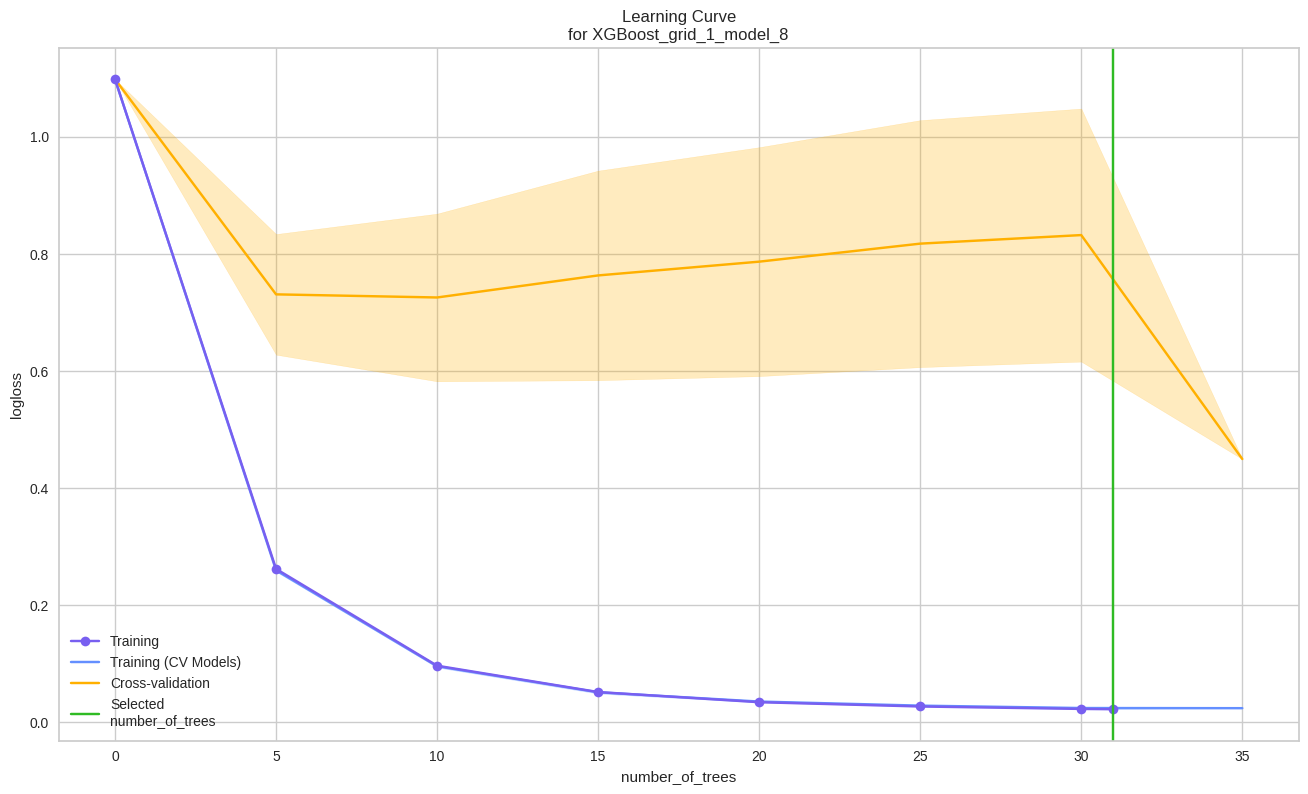

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

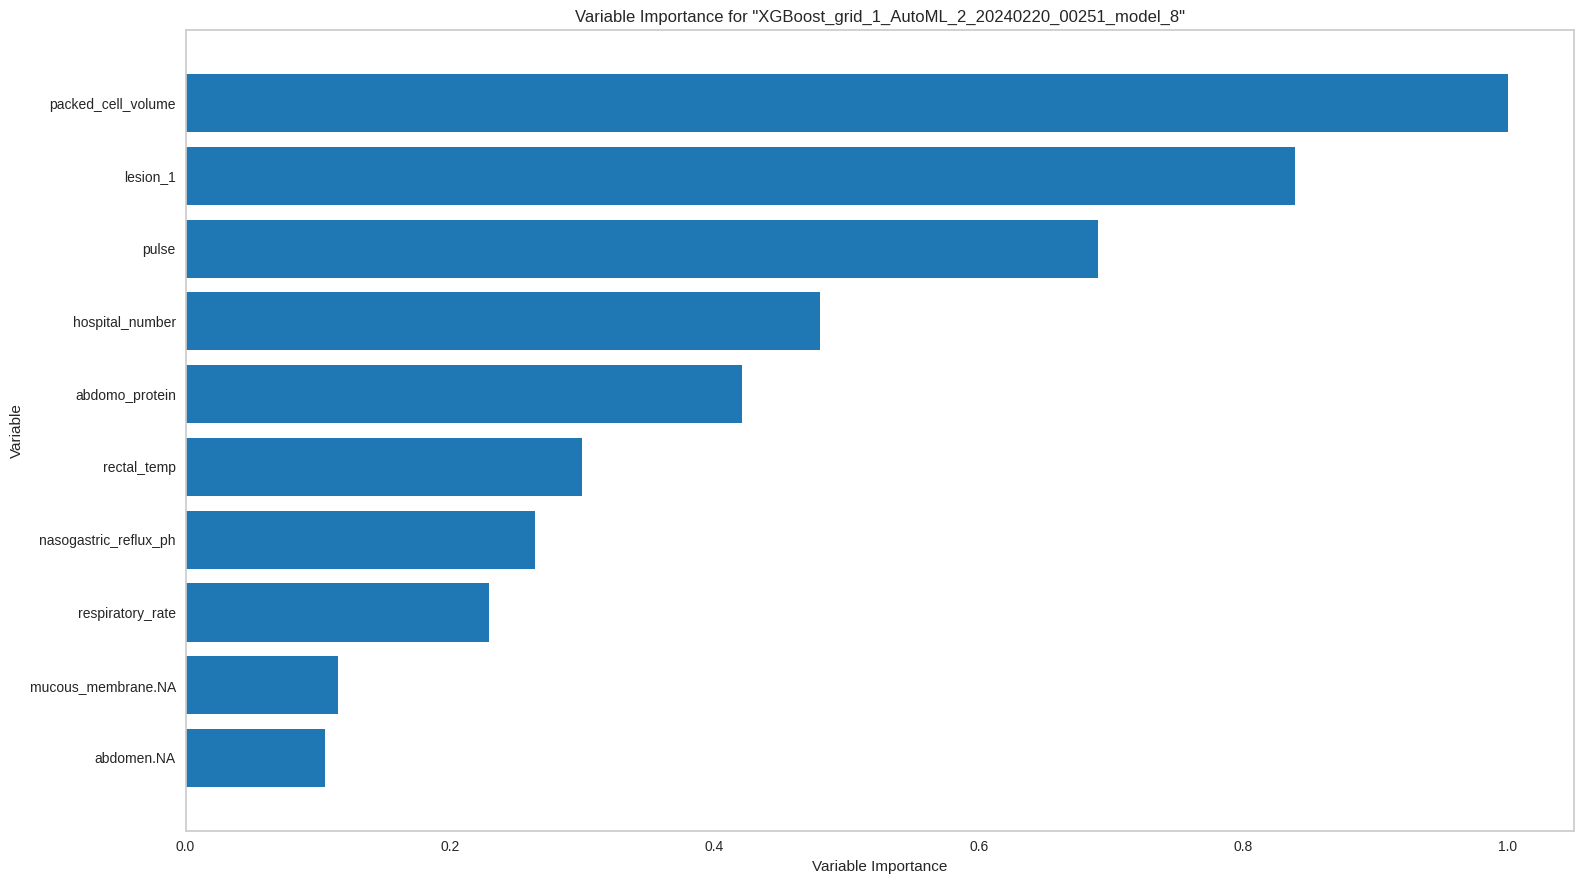

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

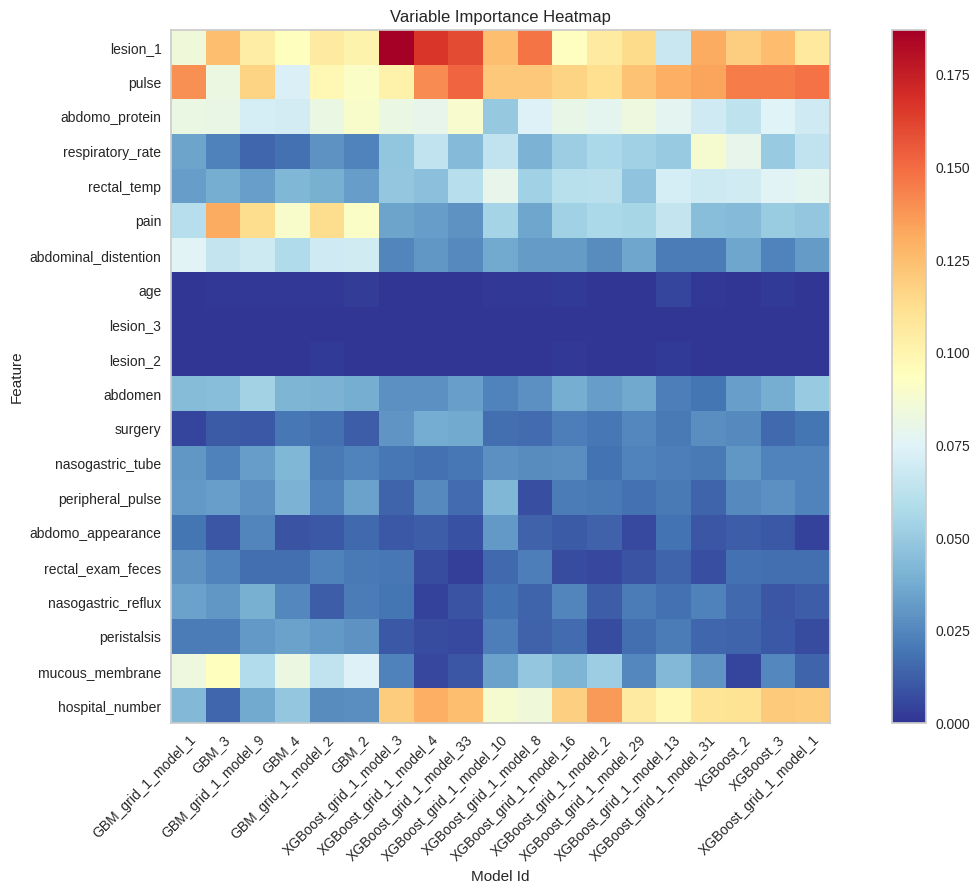

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

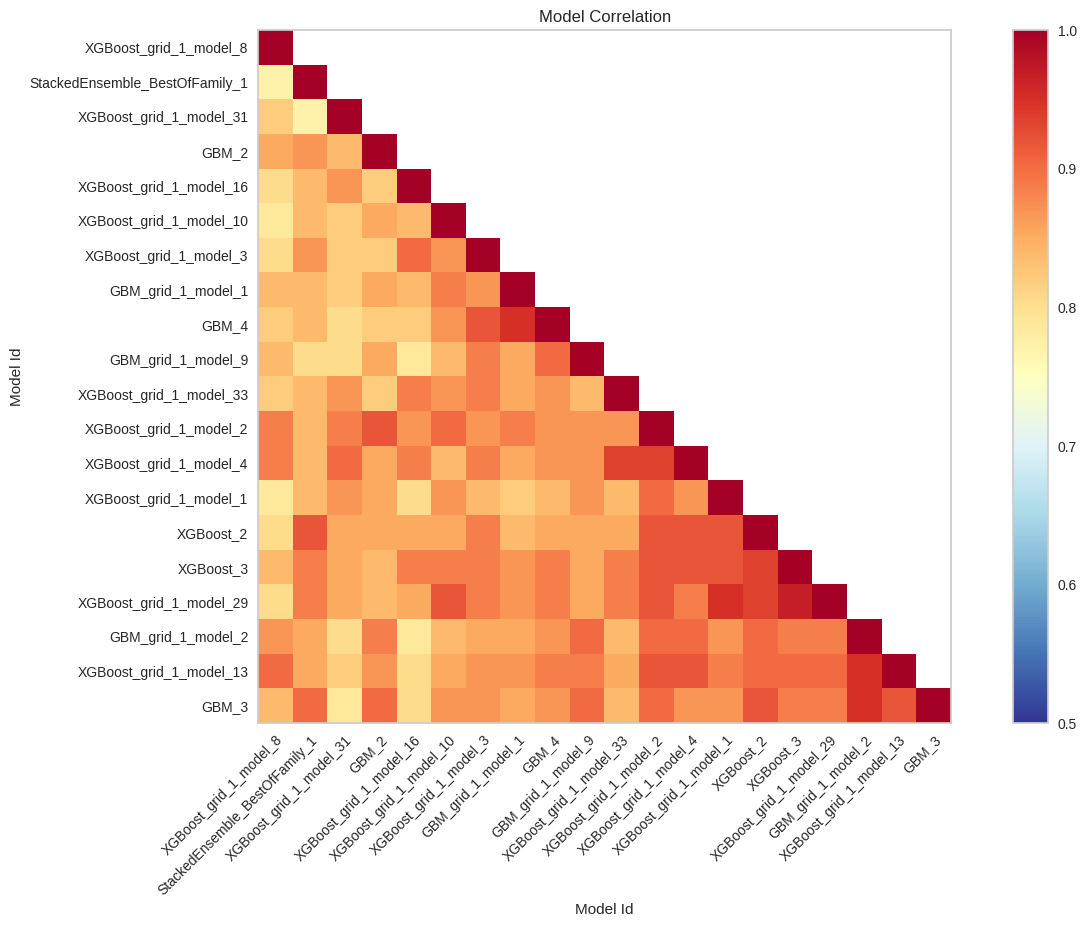

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

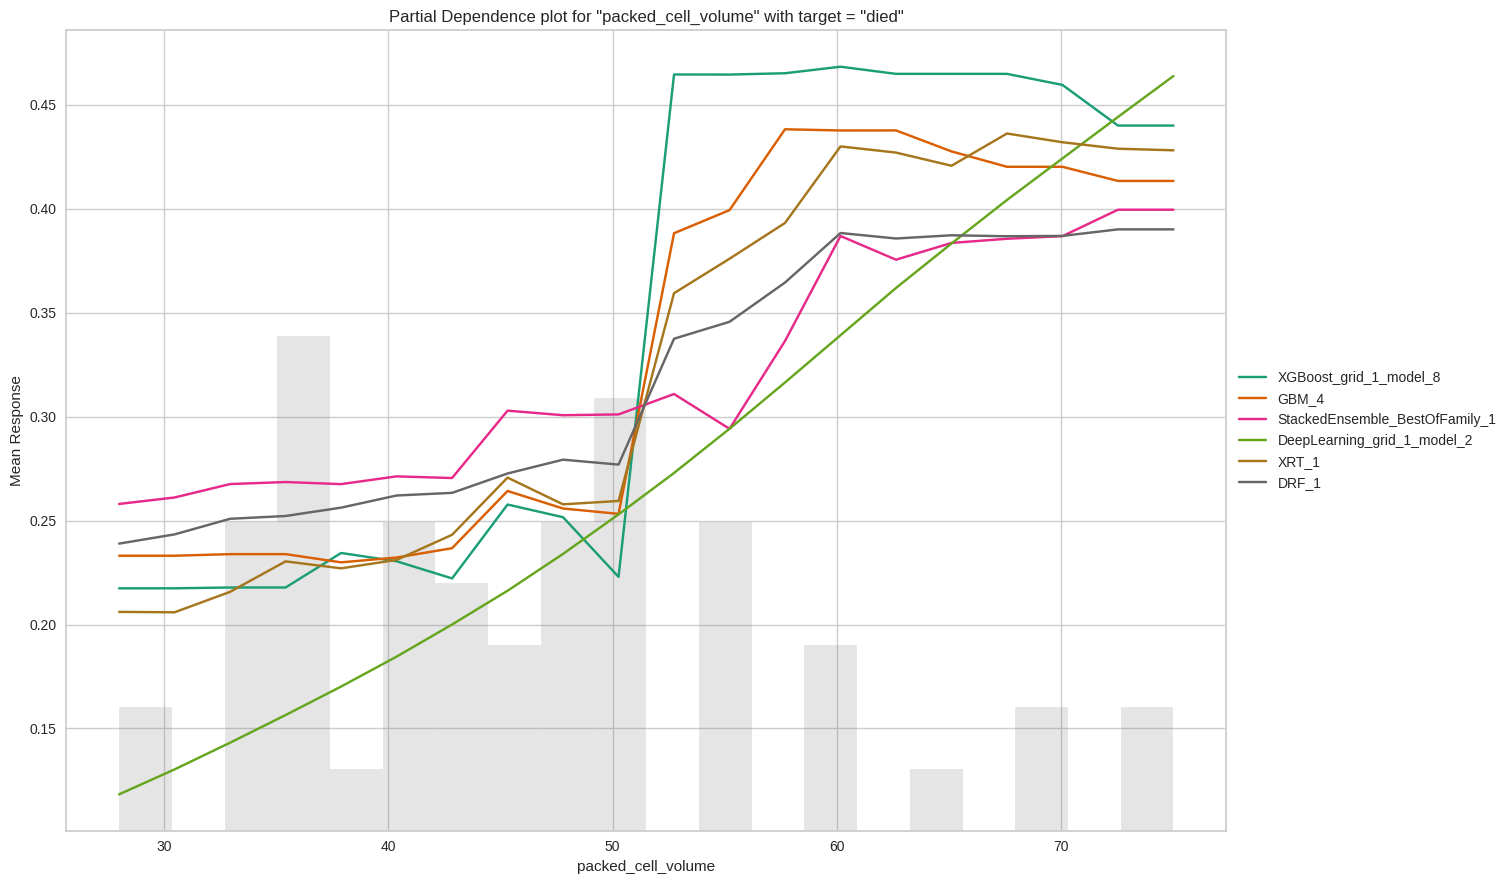

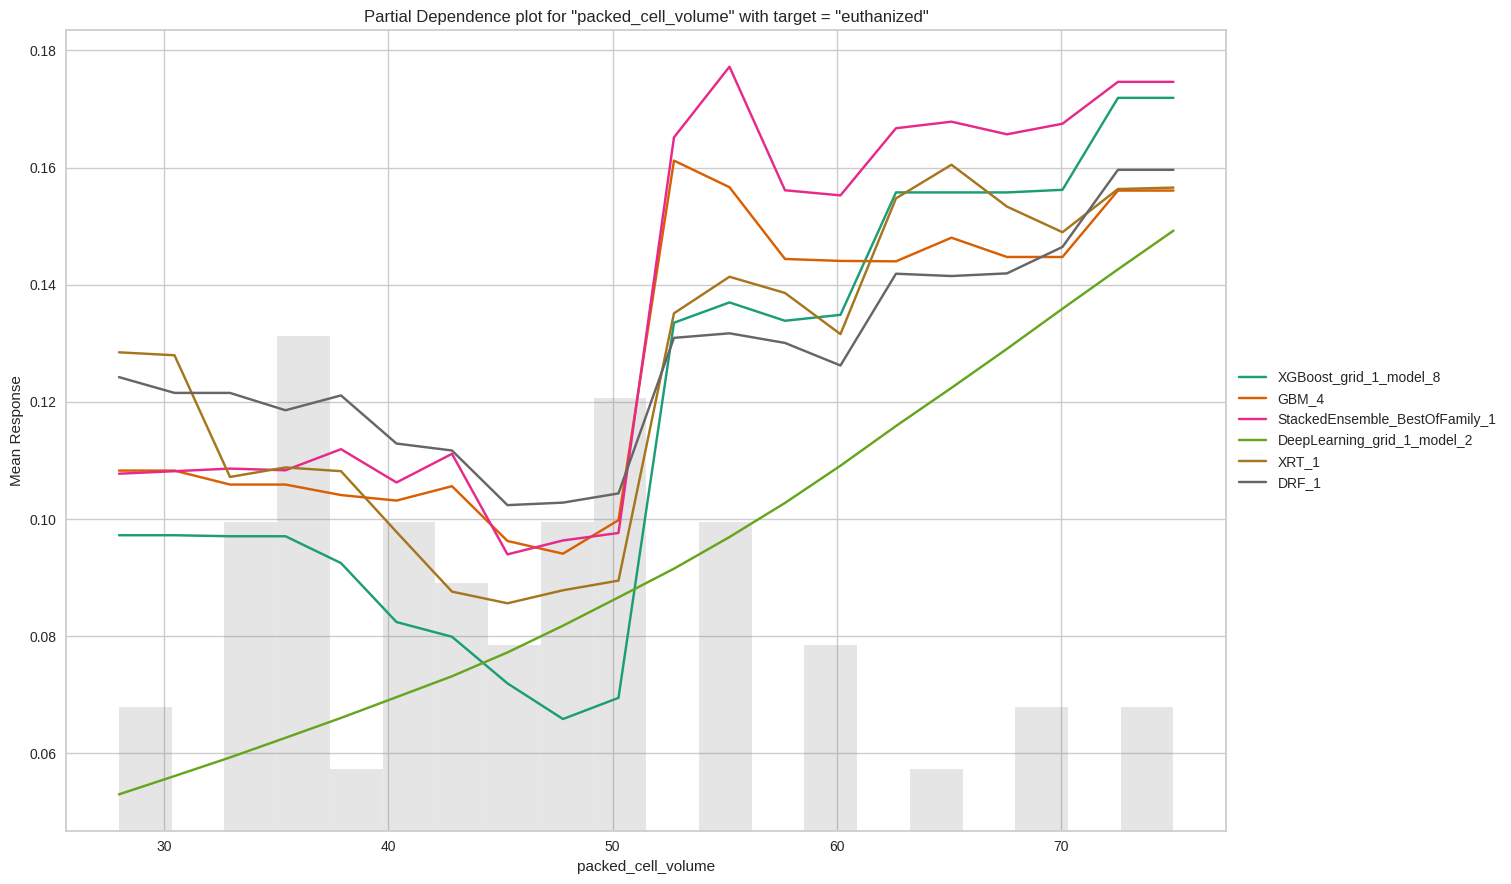

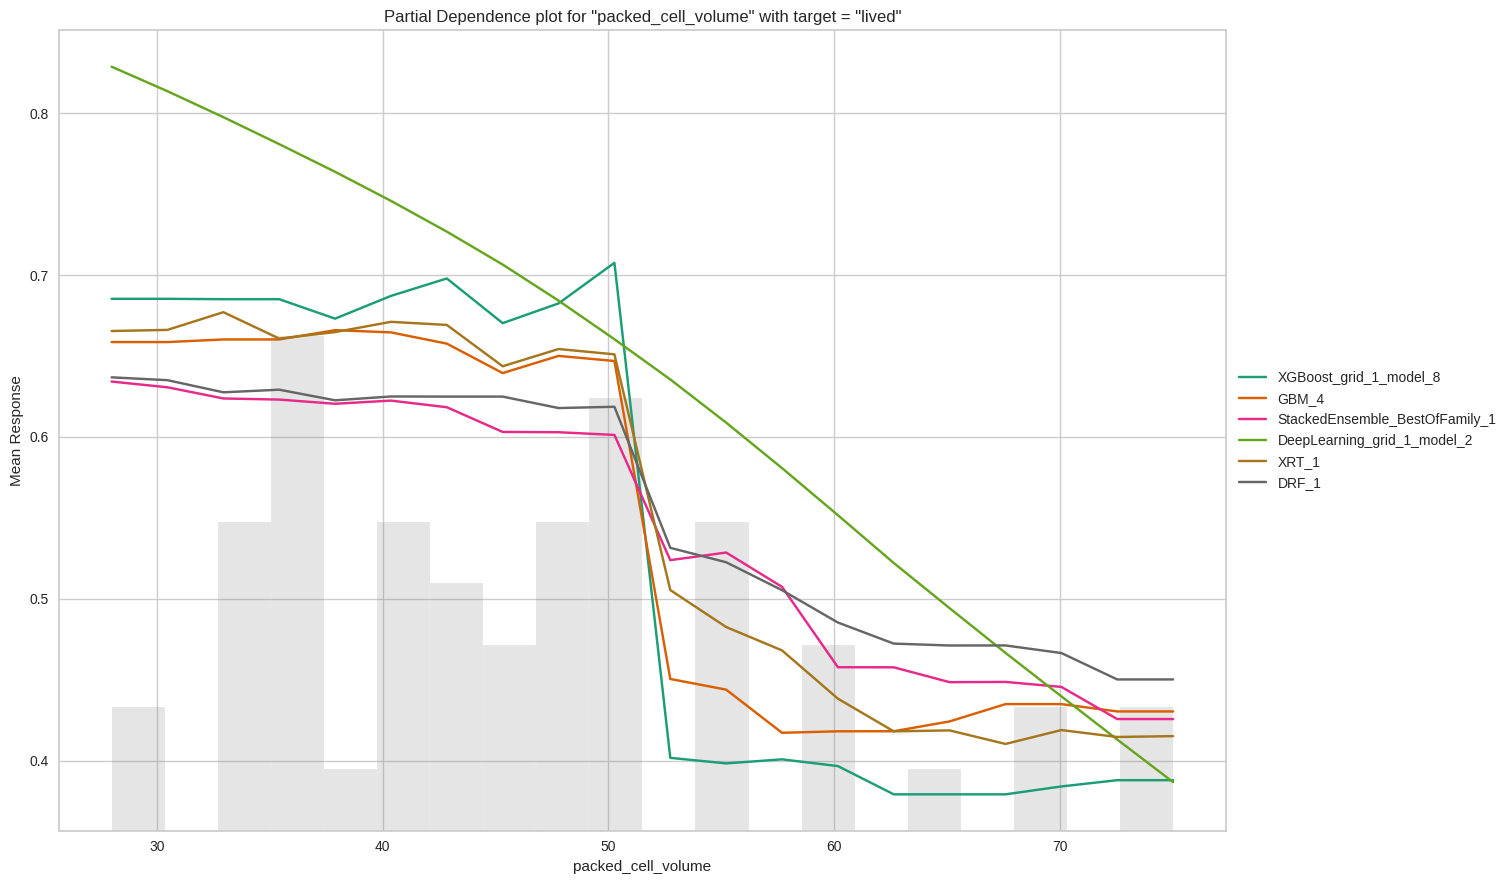

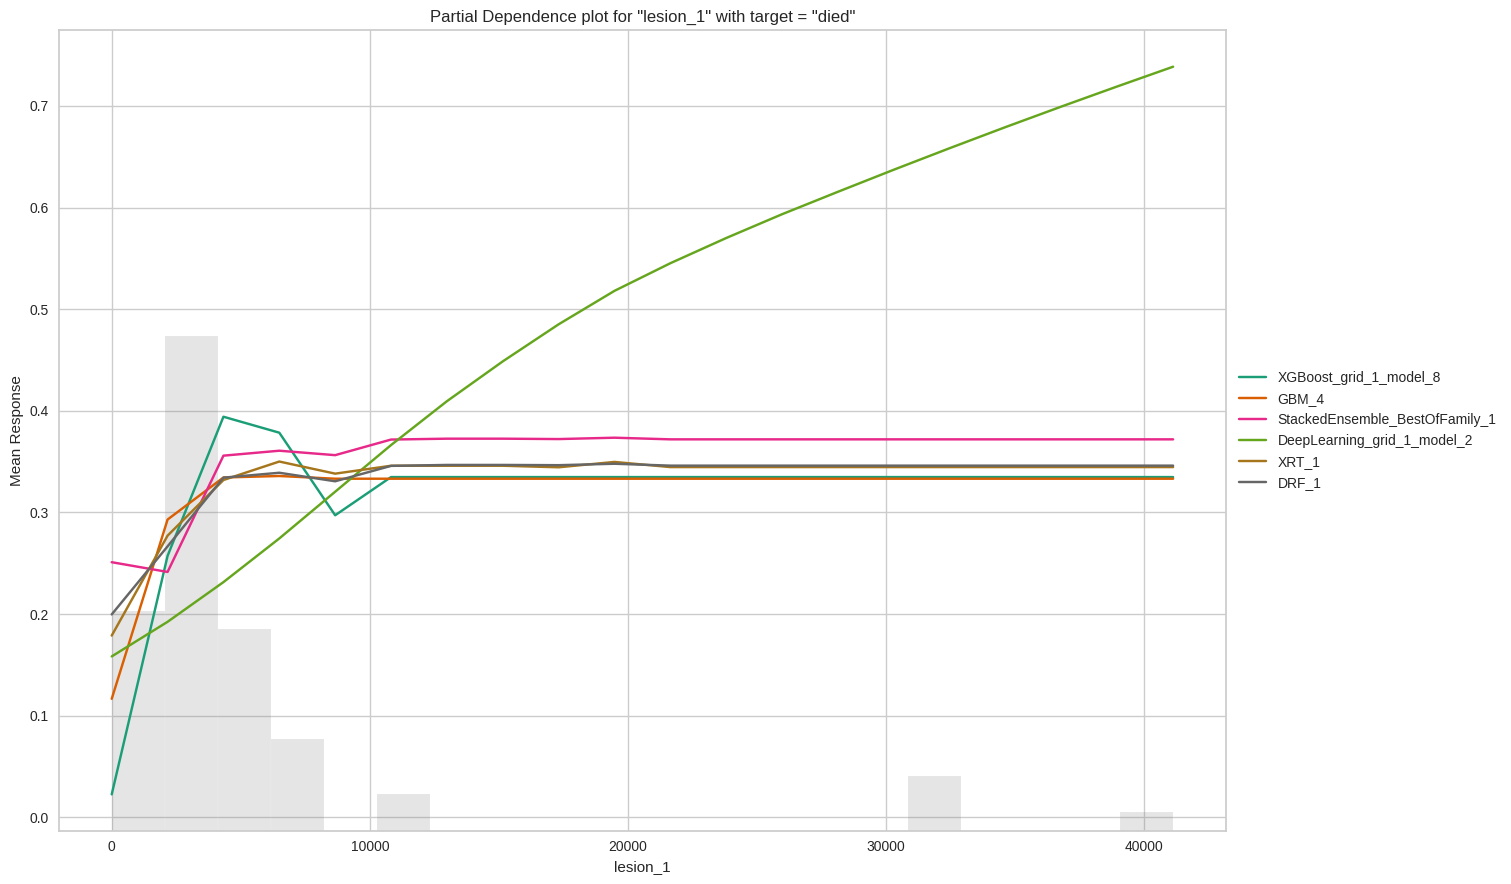

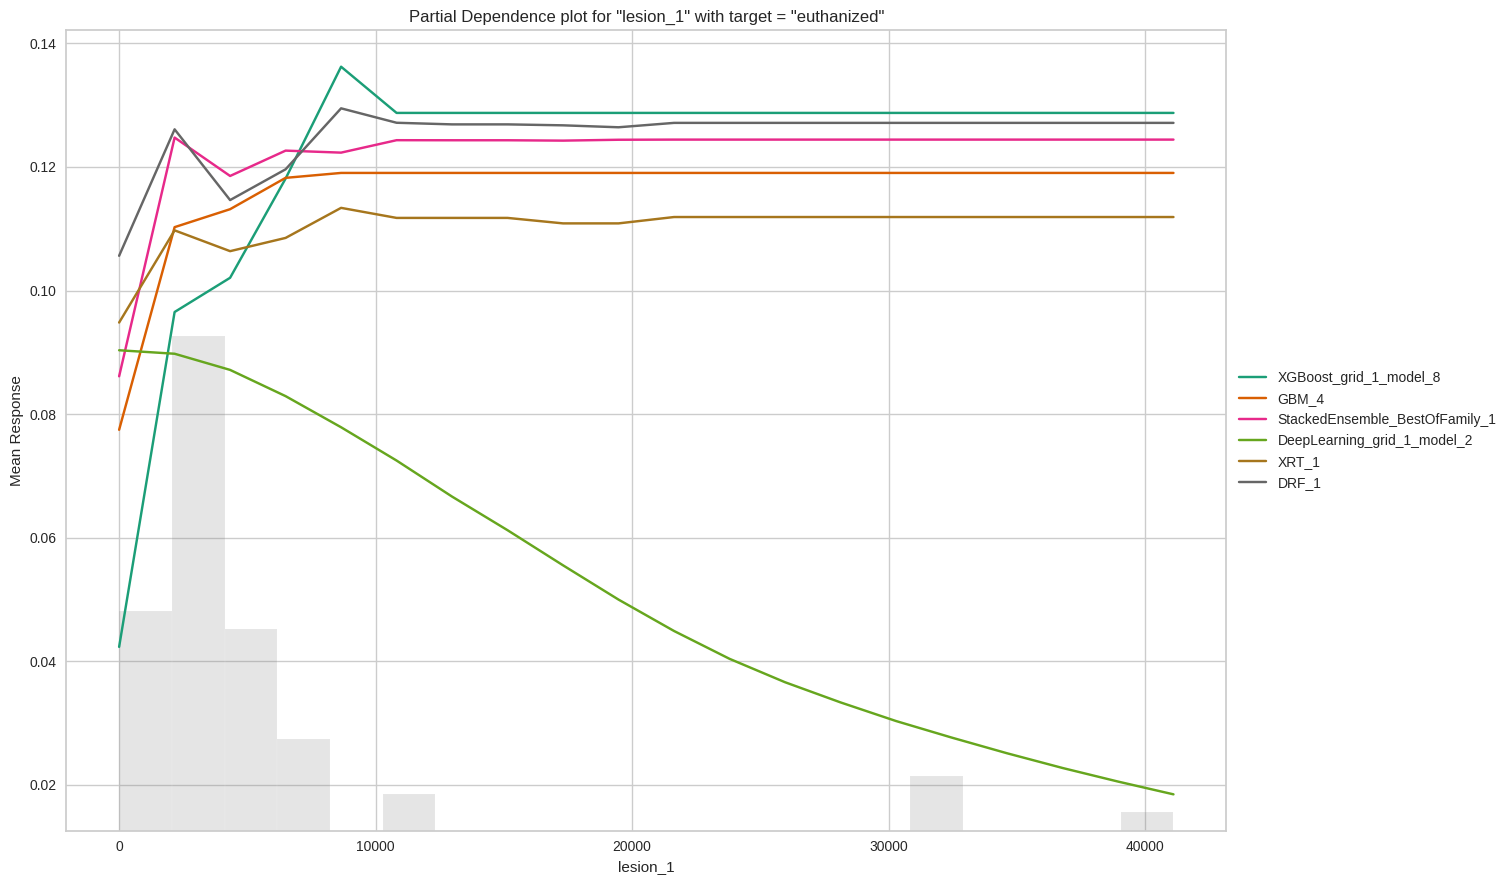

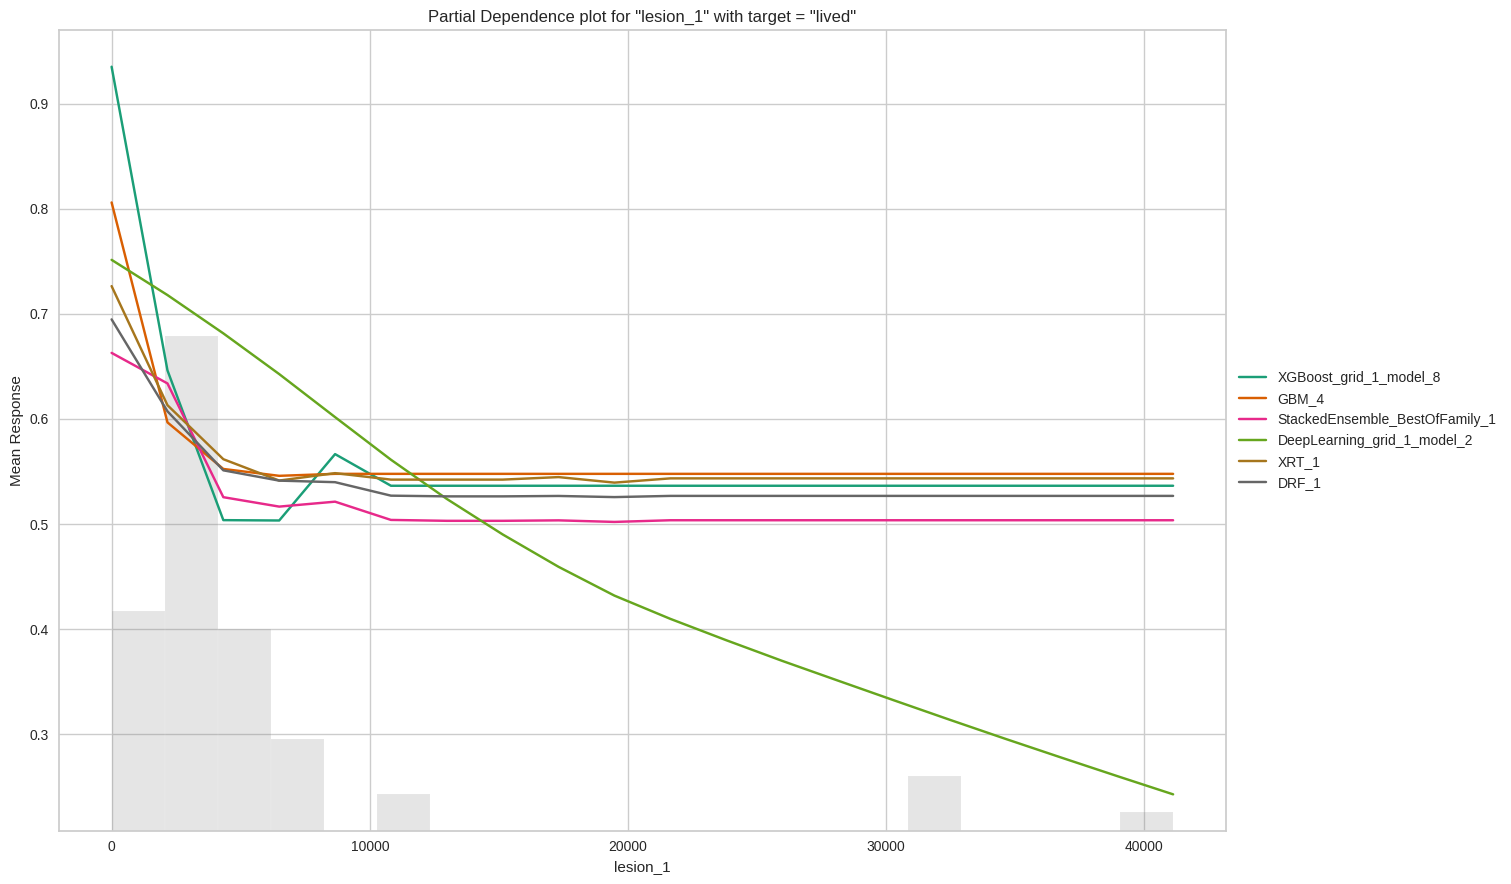

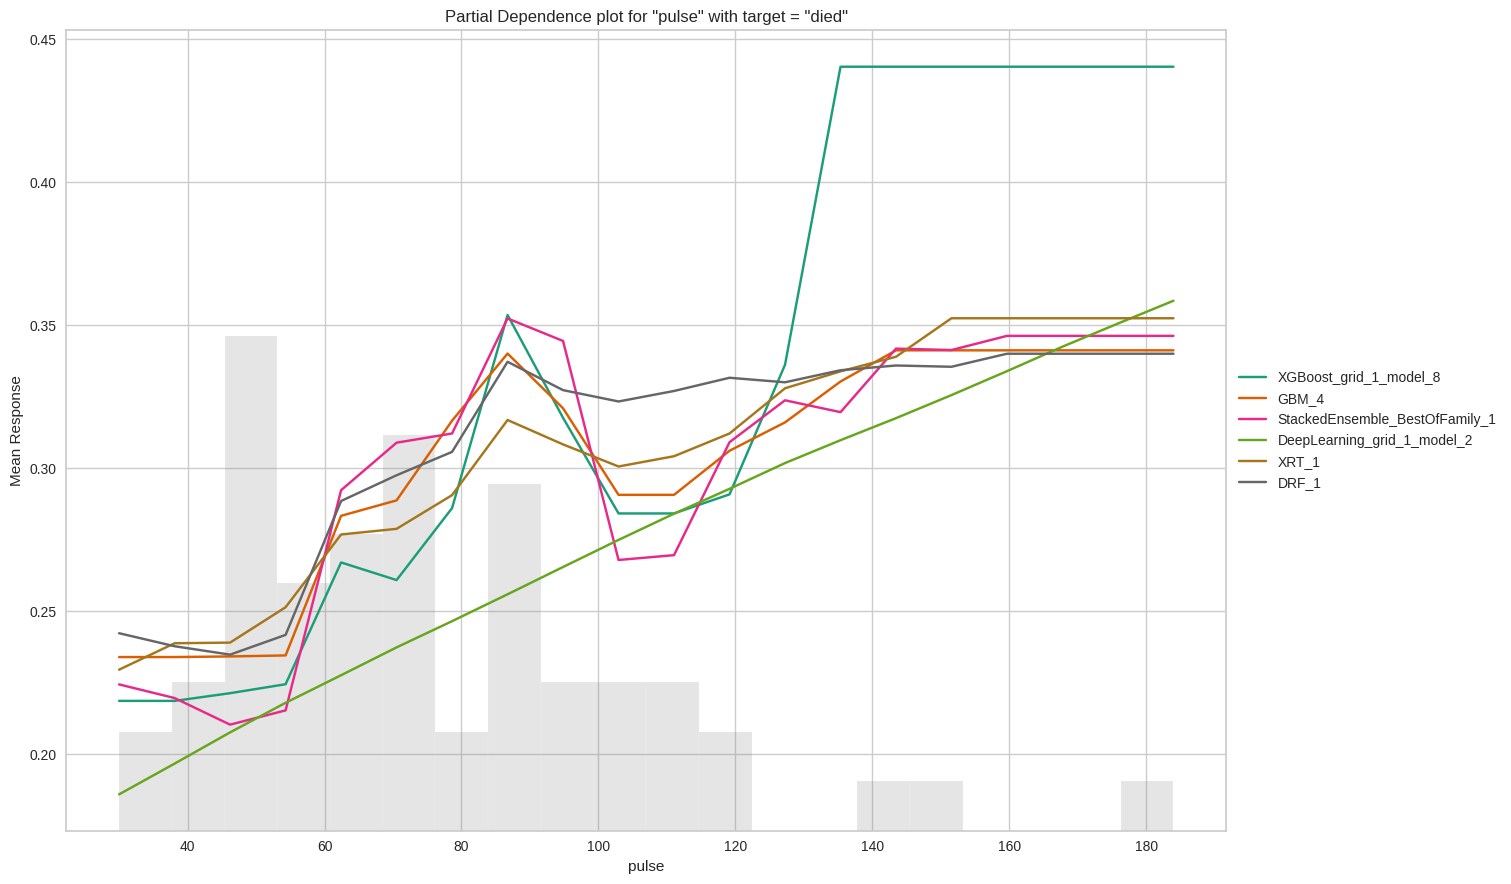

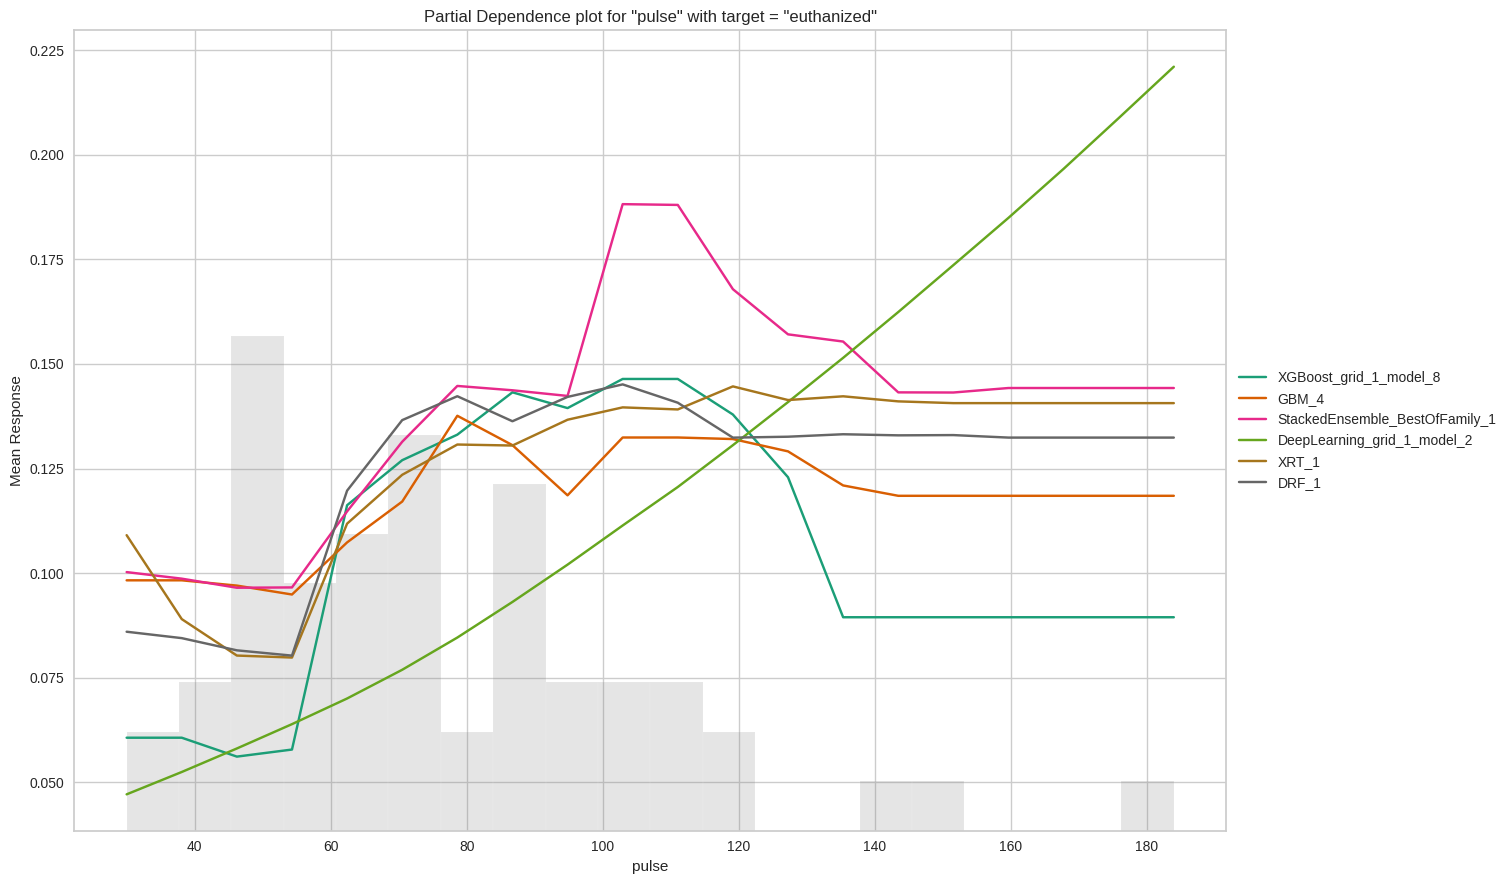

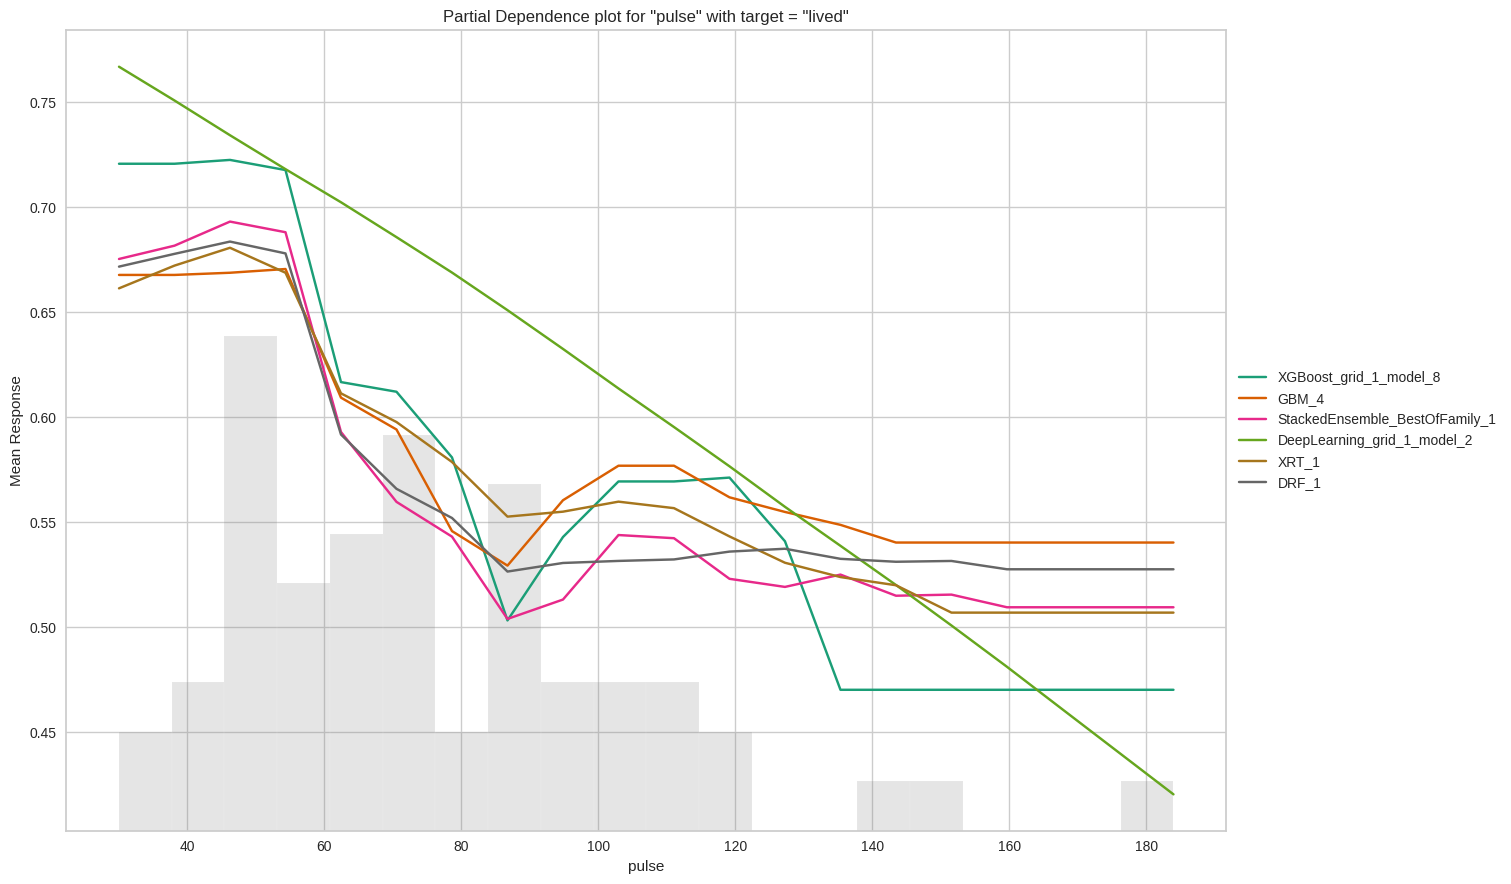

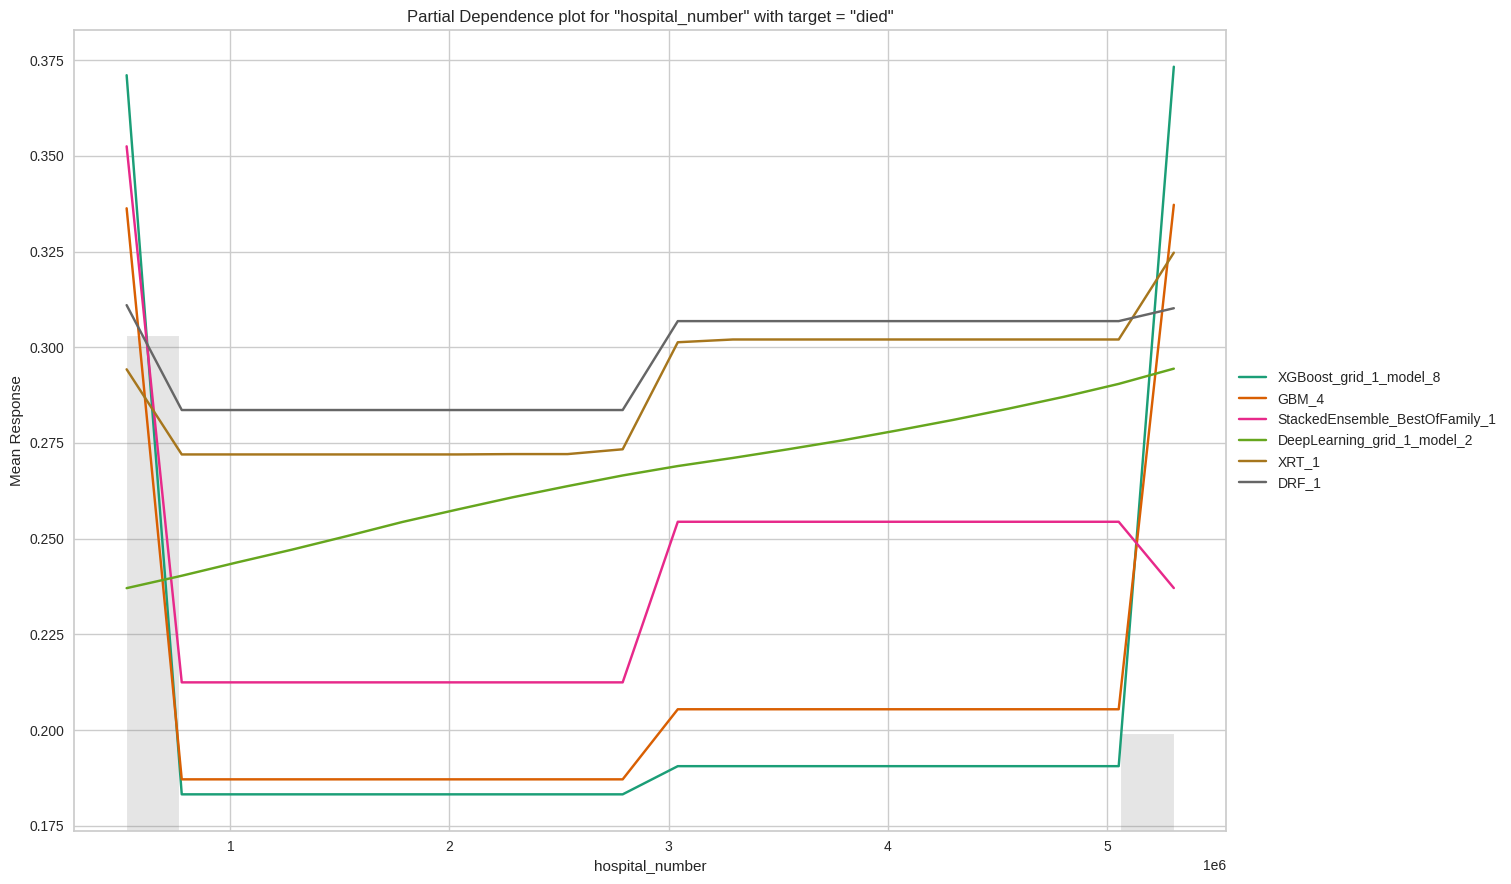

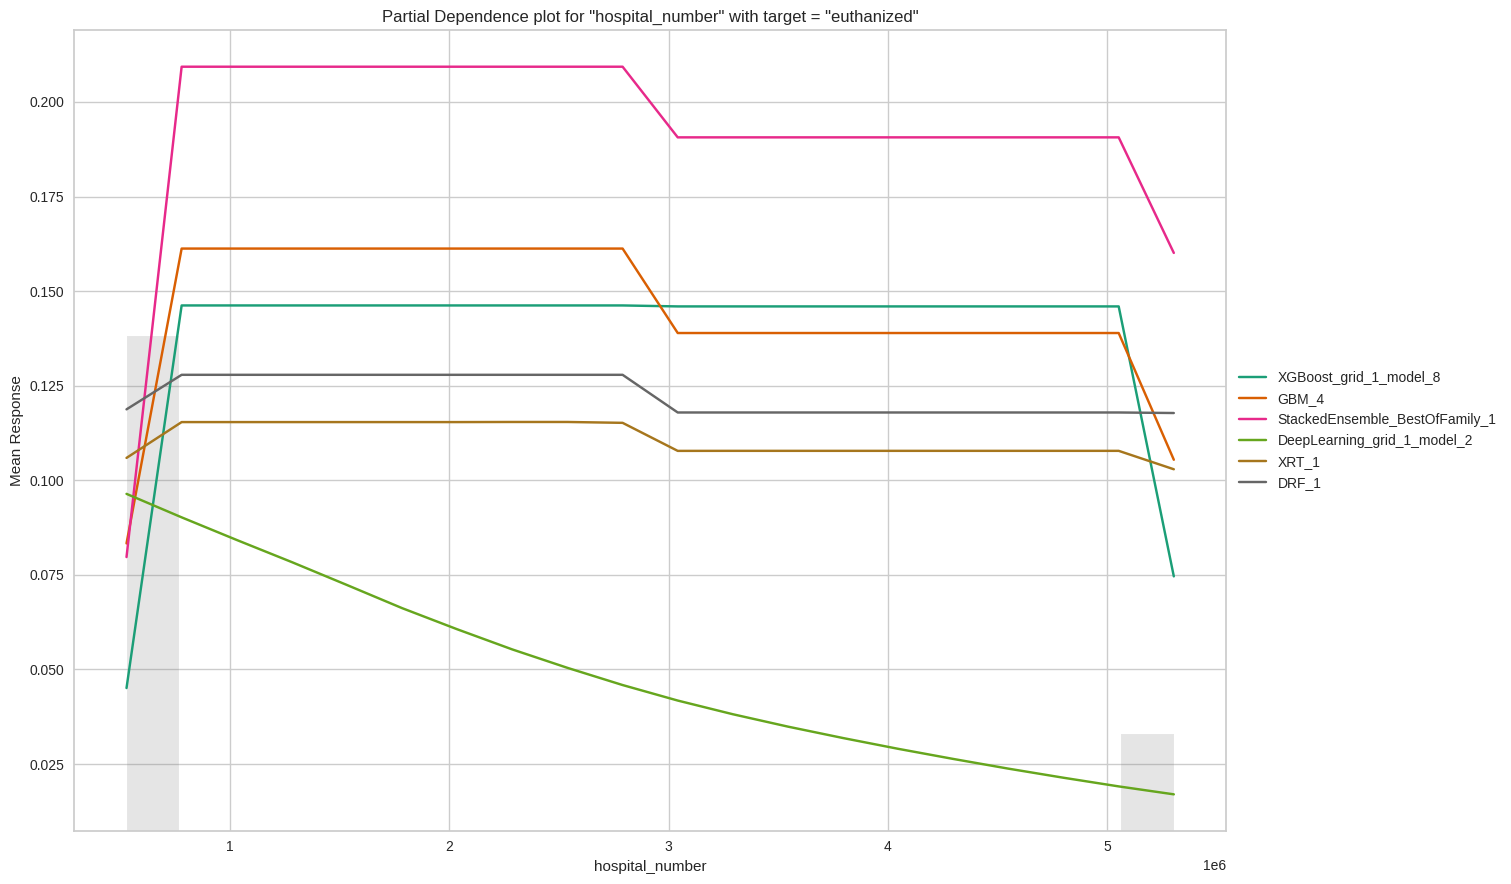

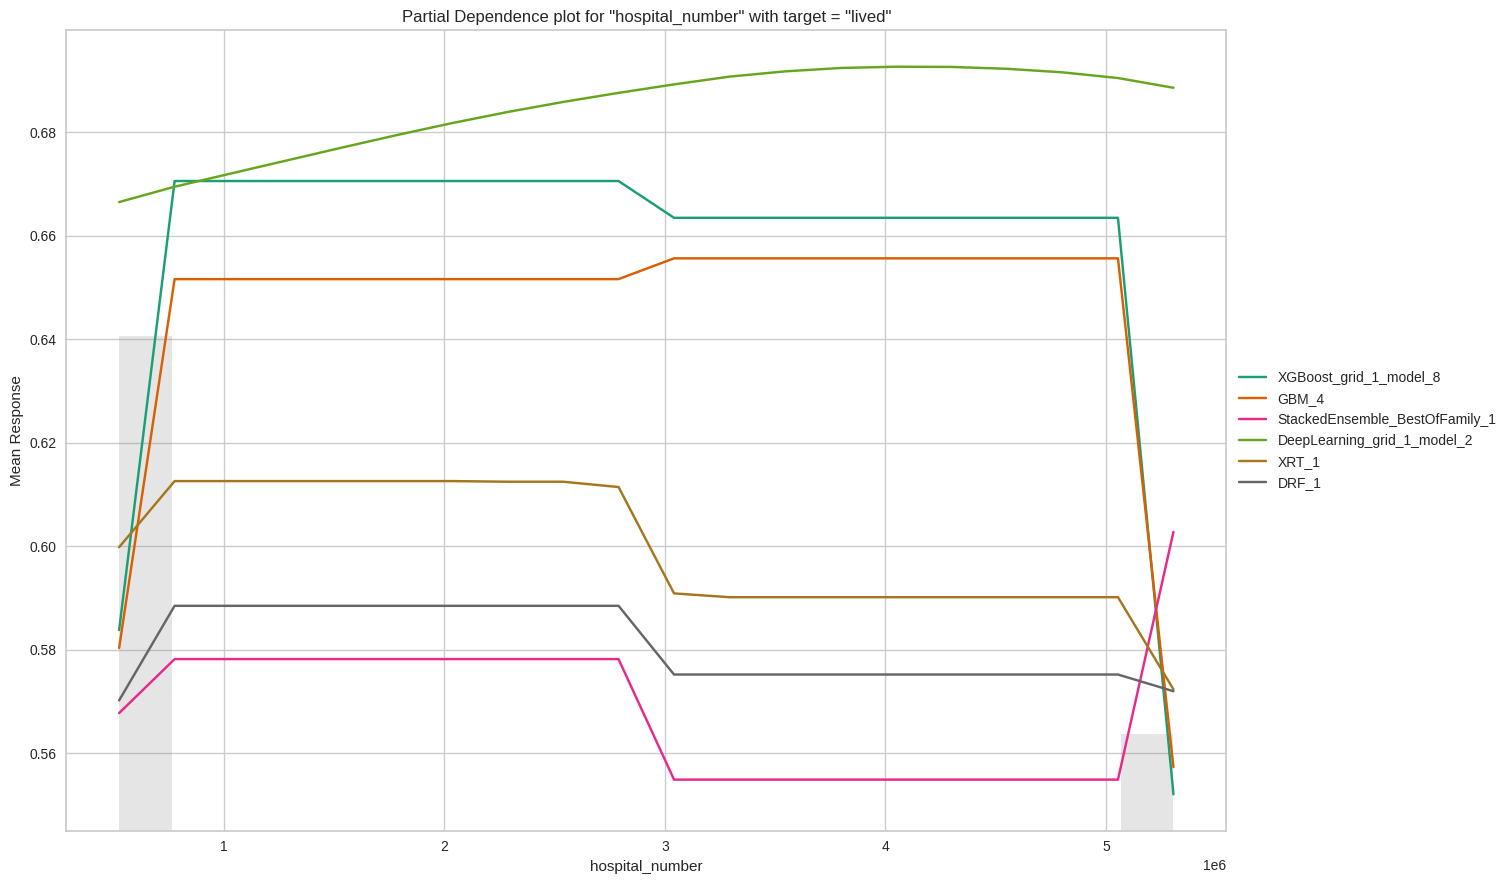

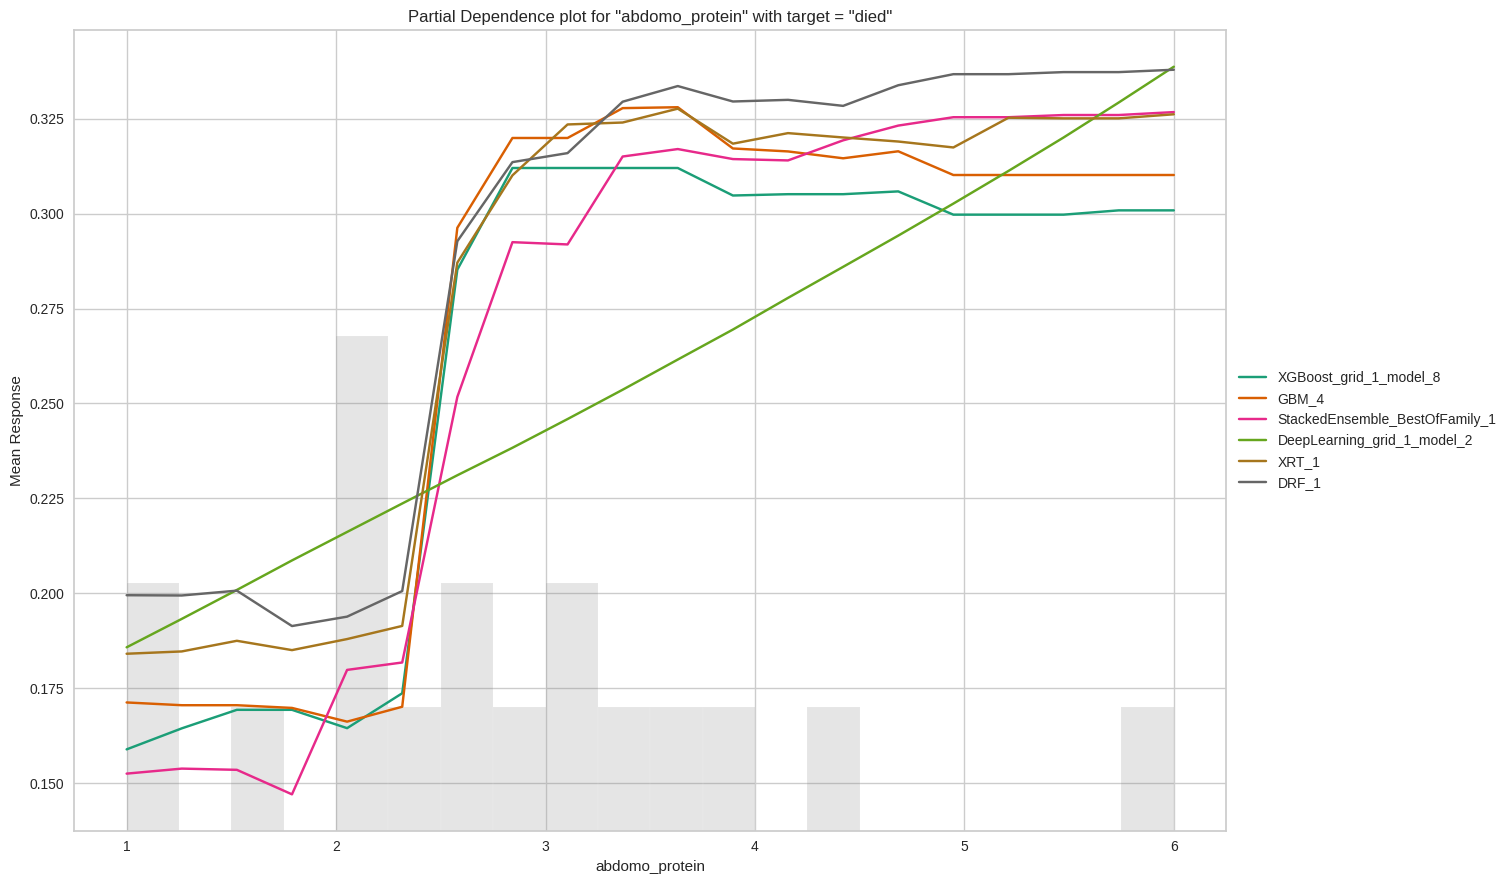

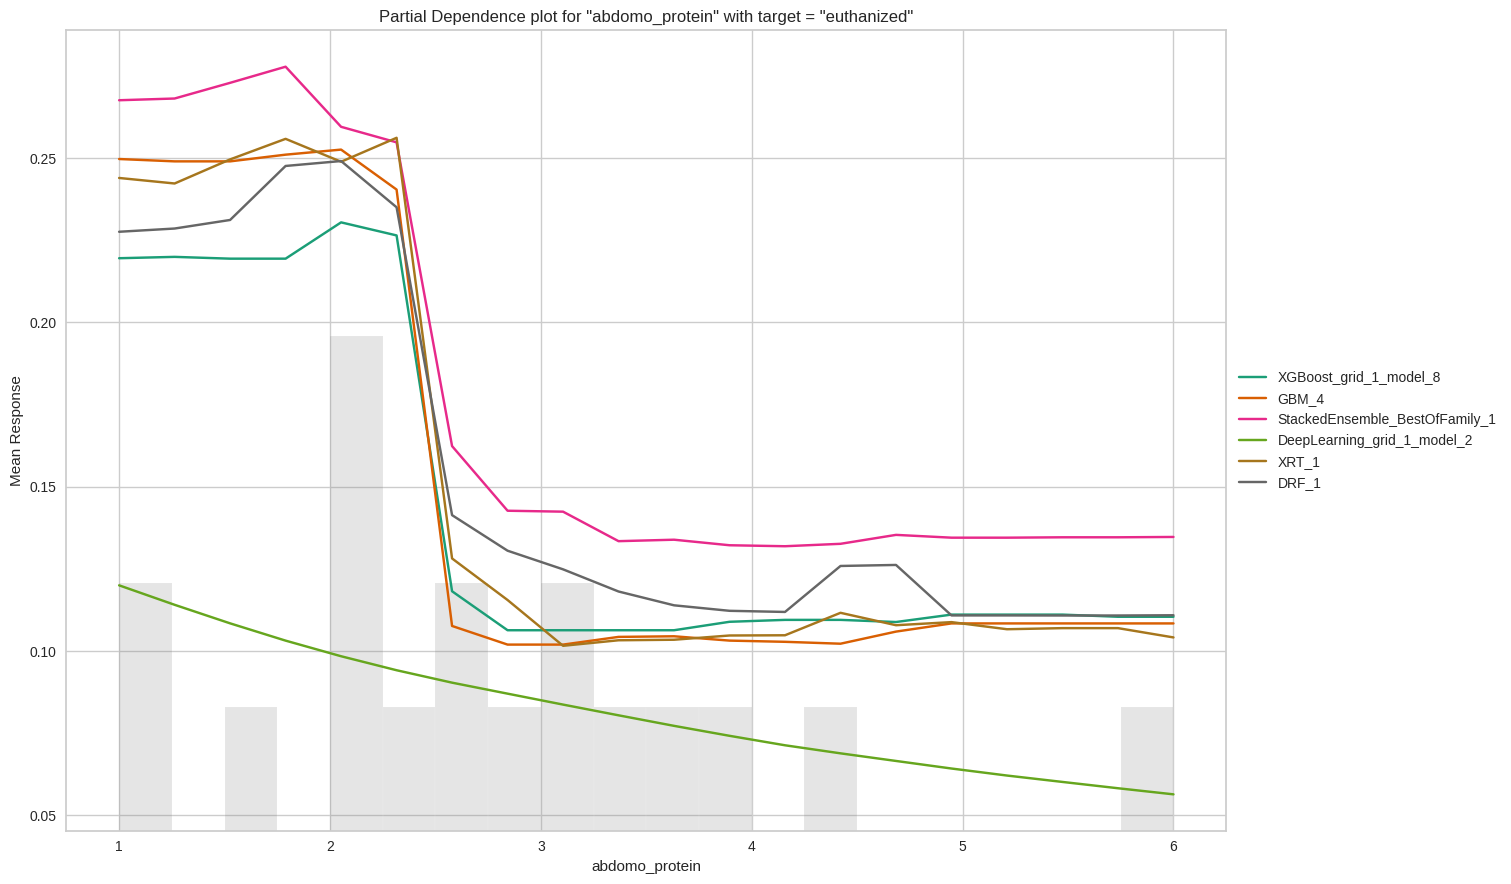

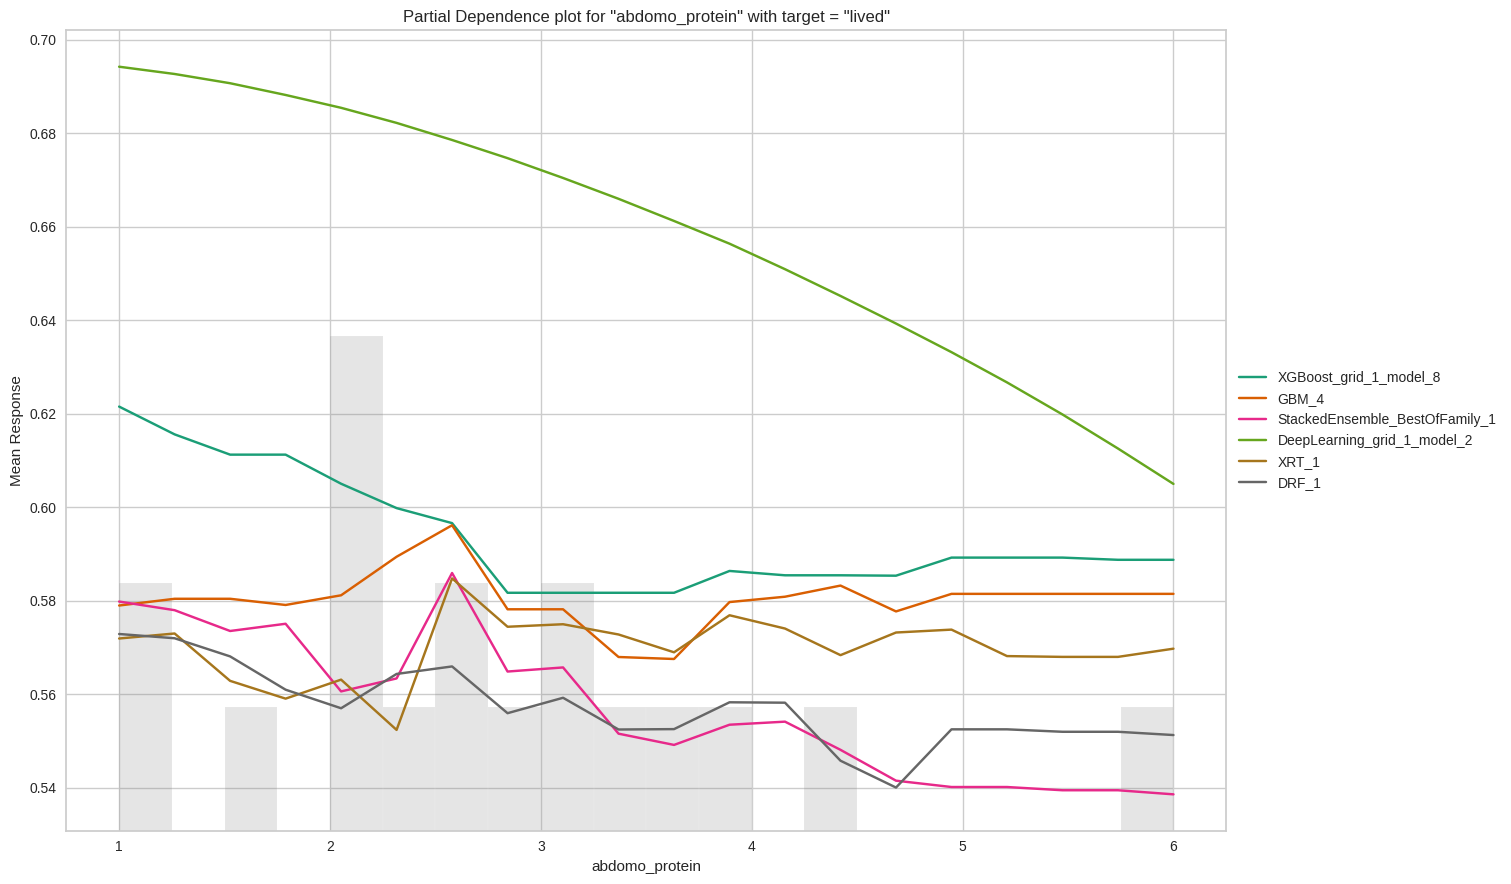

In [156]:
exa = aml1.explain(df1_test)

#**Hyperparameter Tuning**
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [157]:
s = dff['outcome']

t = dff.drop(['outcome'], axis = 1)

In [158]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [159]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [182]:
print(t_train.head())
print(s_train.head())

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
104     yes  adult           527563         37.8   52.0              24.0   
64      yes  adult           529667         39.0   64.0              36.0   
54       no  adult           529461         40.3  114.0              36.0   
188     yes  adult          5299603         38.3   60.0              16.0   
10      yes  adult           528548         38.1   66.0              12.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
104              normal          reduced       pale_pink   
64                 cool           normal   pale_cyanotic   
54                 cool          reduced     normal_pink   
188                cool           normal     normal_pink   
10                 cool          reduced      bright_red   

    capillary_refill_time  ...        abdomen packed_cell_volume  \
104            less_3_sec  ...  distend_large               48.0   
64             more_3_sec  ...  distend_

#**Conclusion**
A fundamental algorithm based on the classification method to predict outcome was derived. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of horse. This gave the best accuracy for test data and model as 'gbm'. From the results shown it can be concluded that the proposed linear model can effectively analyze and predict the outcome if the horse survives or not to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

**Assignment Question/Answers**

Q1) Is the relationship significant? A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated? Assumptions for linear regression are:

Linear relationship- This assumption is not applicable to classification models, as the relationship between the independent variables and the dependent variable is not linear.

Normality: The plot of histogram shows a perfect result for the outcome that is how a horse has lived, died or being euthanized. For this model the same is achieved.
 If the histogram is bell-shaped, then the assumption of normality is met.

Independence: by creating certain scatterplot of the variables against the predicted probabilities. If the points are scattered randomly, then the assumption of independence is met.

Homoscedasticity which means normality of the error: a scatterplot of the variables against the predicted probabilities. If the variance of the residuals is constant, then the assumption of homoscedasticity is met.So it is not violated.

No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between variables Rooms and BuildingArea.


Q3) Is there any multicollinearity in the model?

 When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists.
Confusion Matrix:

[[11  0  6]
 [ 0  1  8]
 [ 4  0 30]]

 Currently high correlation exists between total_protein and nasogastric_reflux_ph.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables? Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, total_protein and nasogastric_reflux_ph
This 2 columns are independent and are not correlated with any other predictor variable.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. From the variable importance plot, the most to least important variables are displayed. For my model Packed_cell_module, lesion_1, pain and mucous membrane are top 4 most important variables to determine outcome of a horse.

Q6) Does the model make sense?

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. RMSE: 0.4835380843649151o which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help?

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don't take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help. RMSE: 0.4835380843649151

Q8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05. For this model all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

 To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth', 'min_samples_split'and 'n_estimators'.


MIT License

Copyright (c) 2024 Malav-Bhatt

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**Reference**

Sckit learn offcial documentation Refered Towards Data Science Eli5 official documentation JDilling3r/CovidHospitalPredication subject to MIT License The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documentation.

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

For getiing started- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression

Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML